In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
import re

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [3]:
df=pd.read_csv("airline_passenger_satisfaction.csv")

In [4]:
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [6]:
df.isnull().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

<AxesSubplot:>

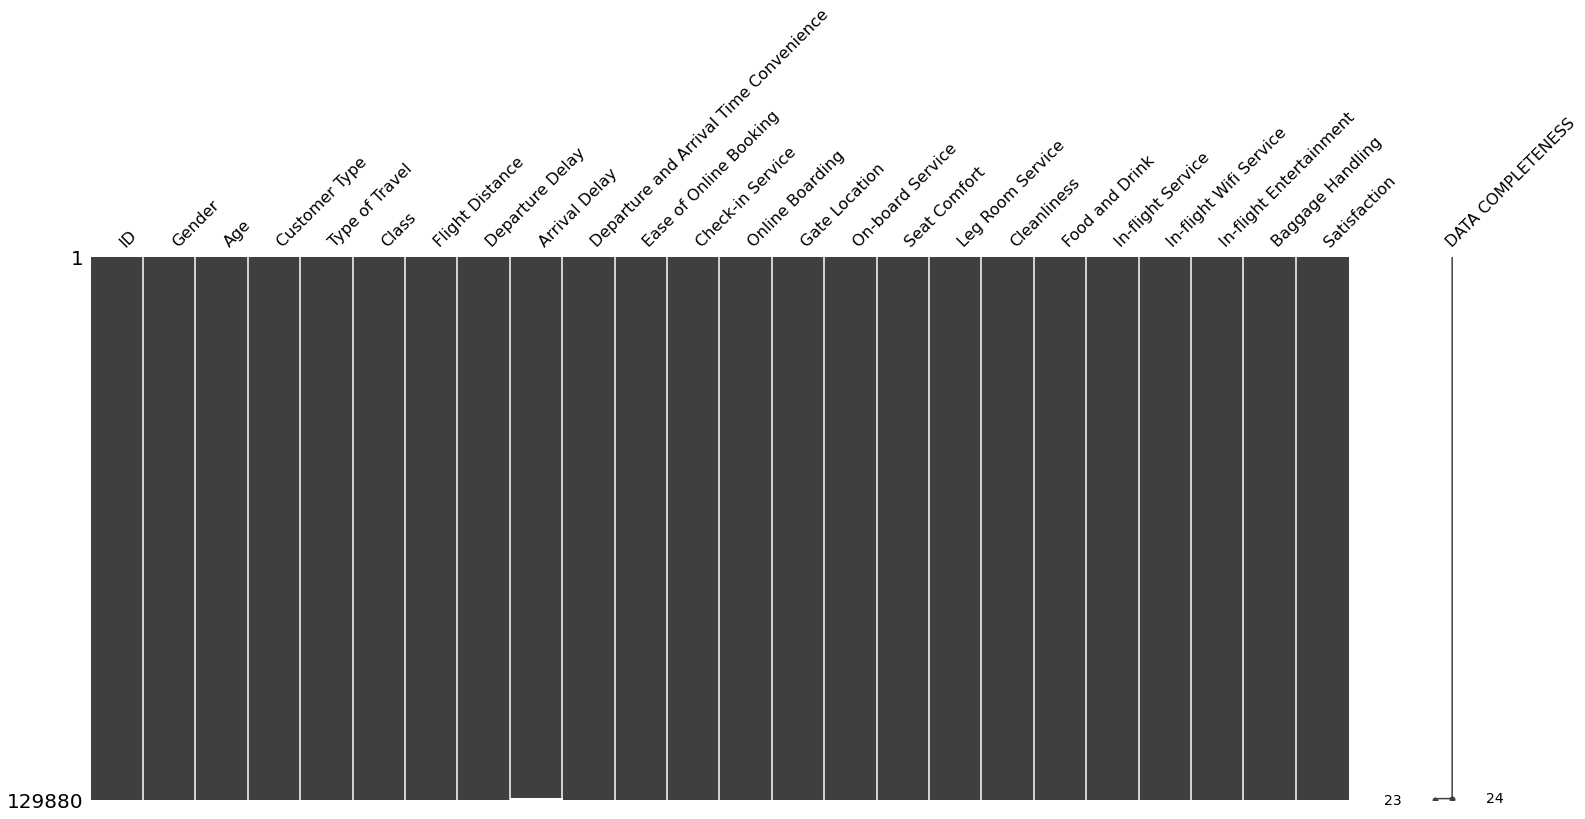

In [7]:
#showing gaps which have missing values
import missingno as msno
msno.matrix(df, labels=True, sort="descending")

In [8]:
#dropping null values 
df1=df.dropna()
df1=df1.drop("ID",axis=1)

# EDA

<AxesSubplot:>

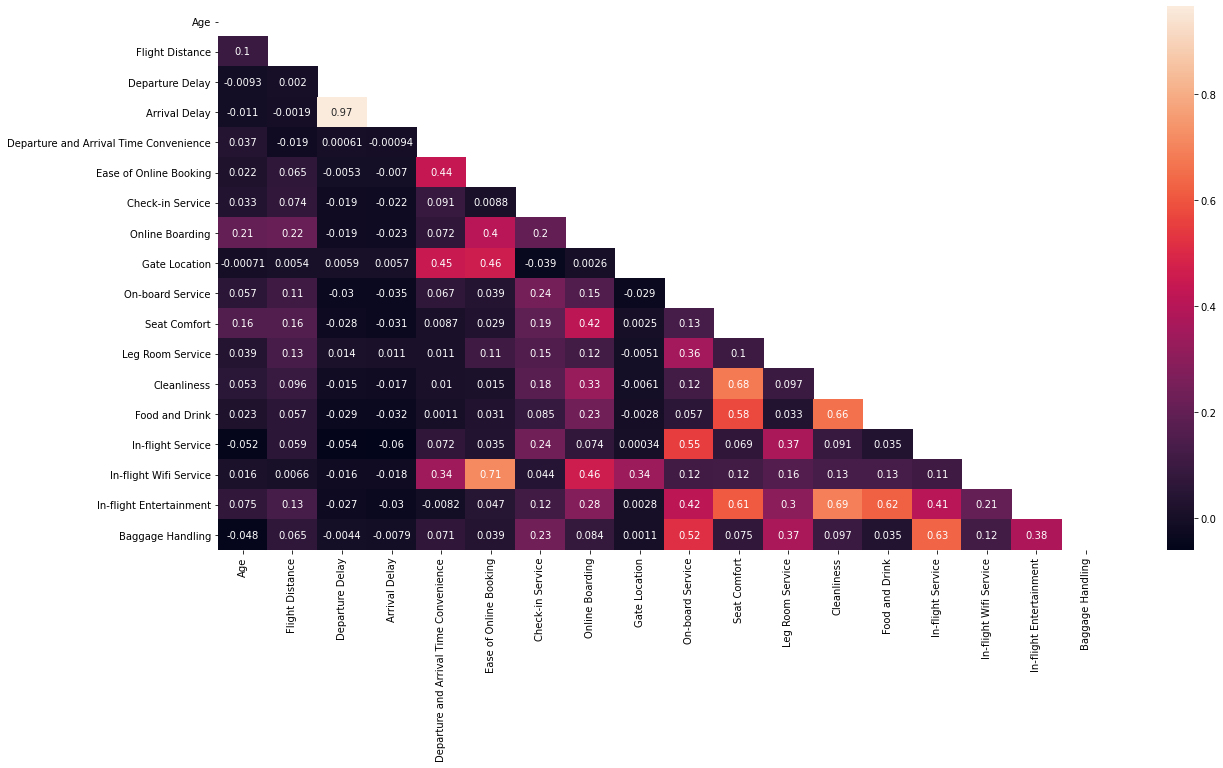

In [9]:
#correlation heatmap
corr=df1.corr()
mask=np.triu(np.ones_like(corr,dtype=bool))
sns.heatmap(corr,mask=mask,annot=True)

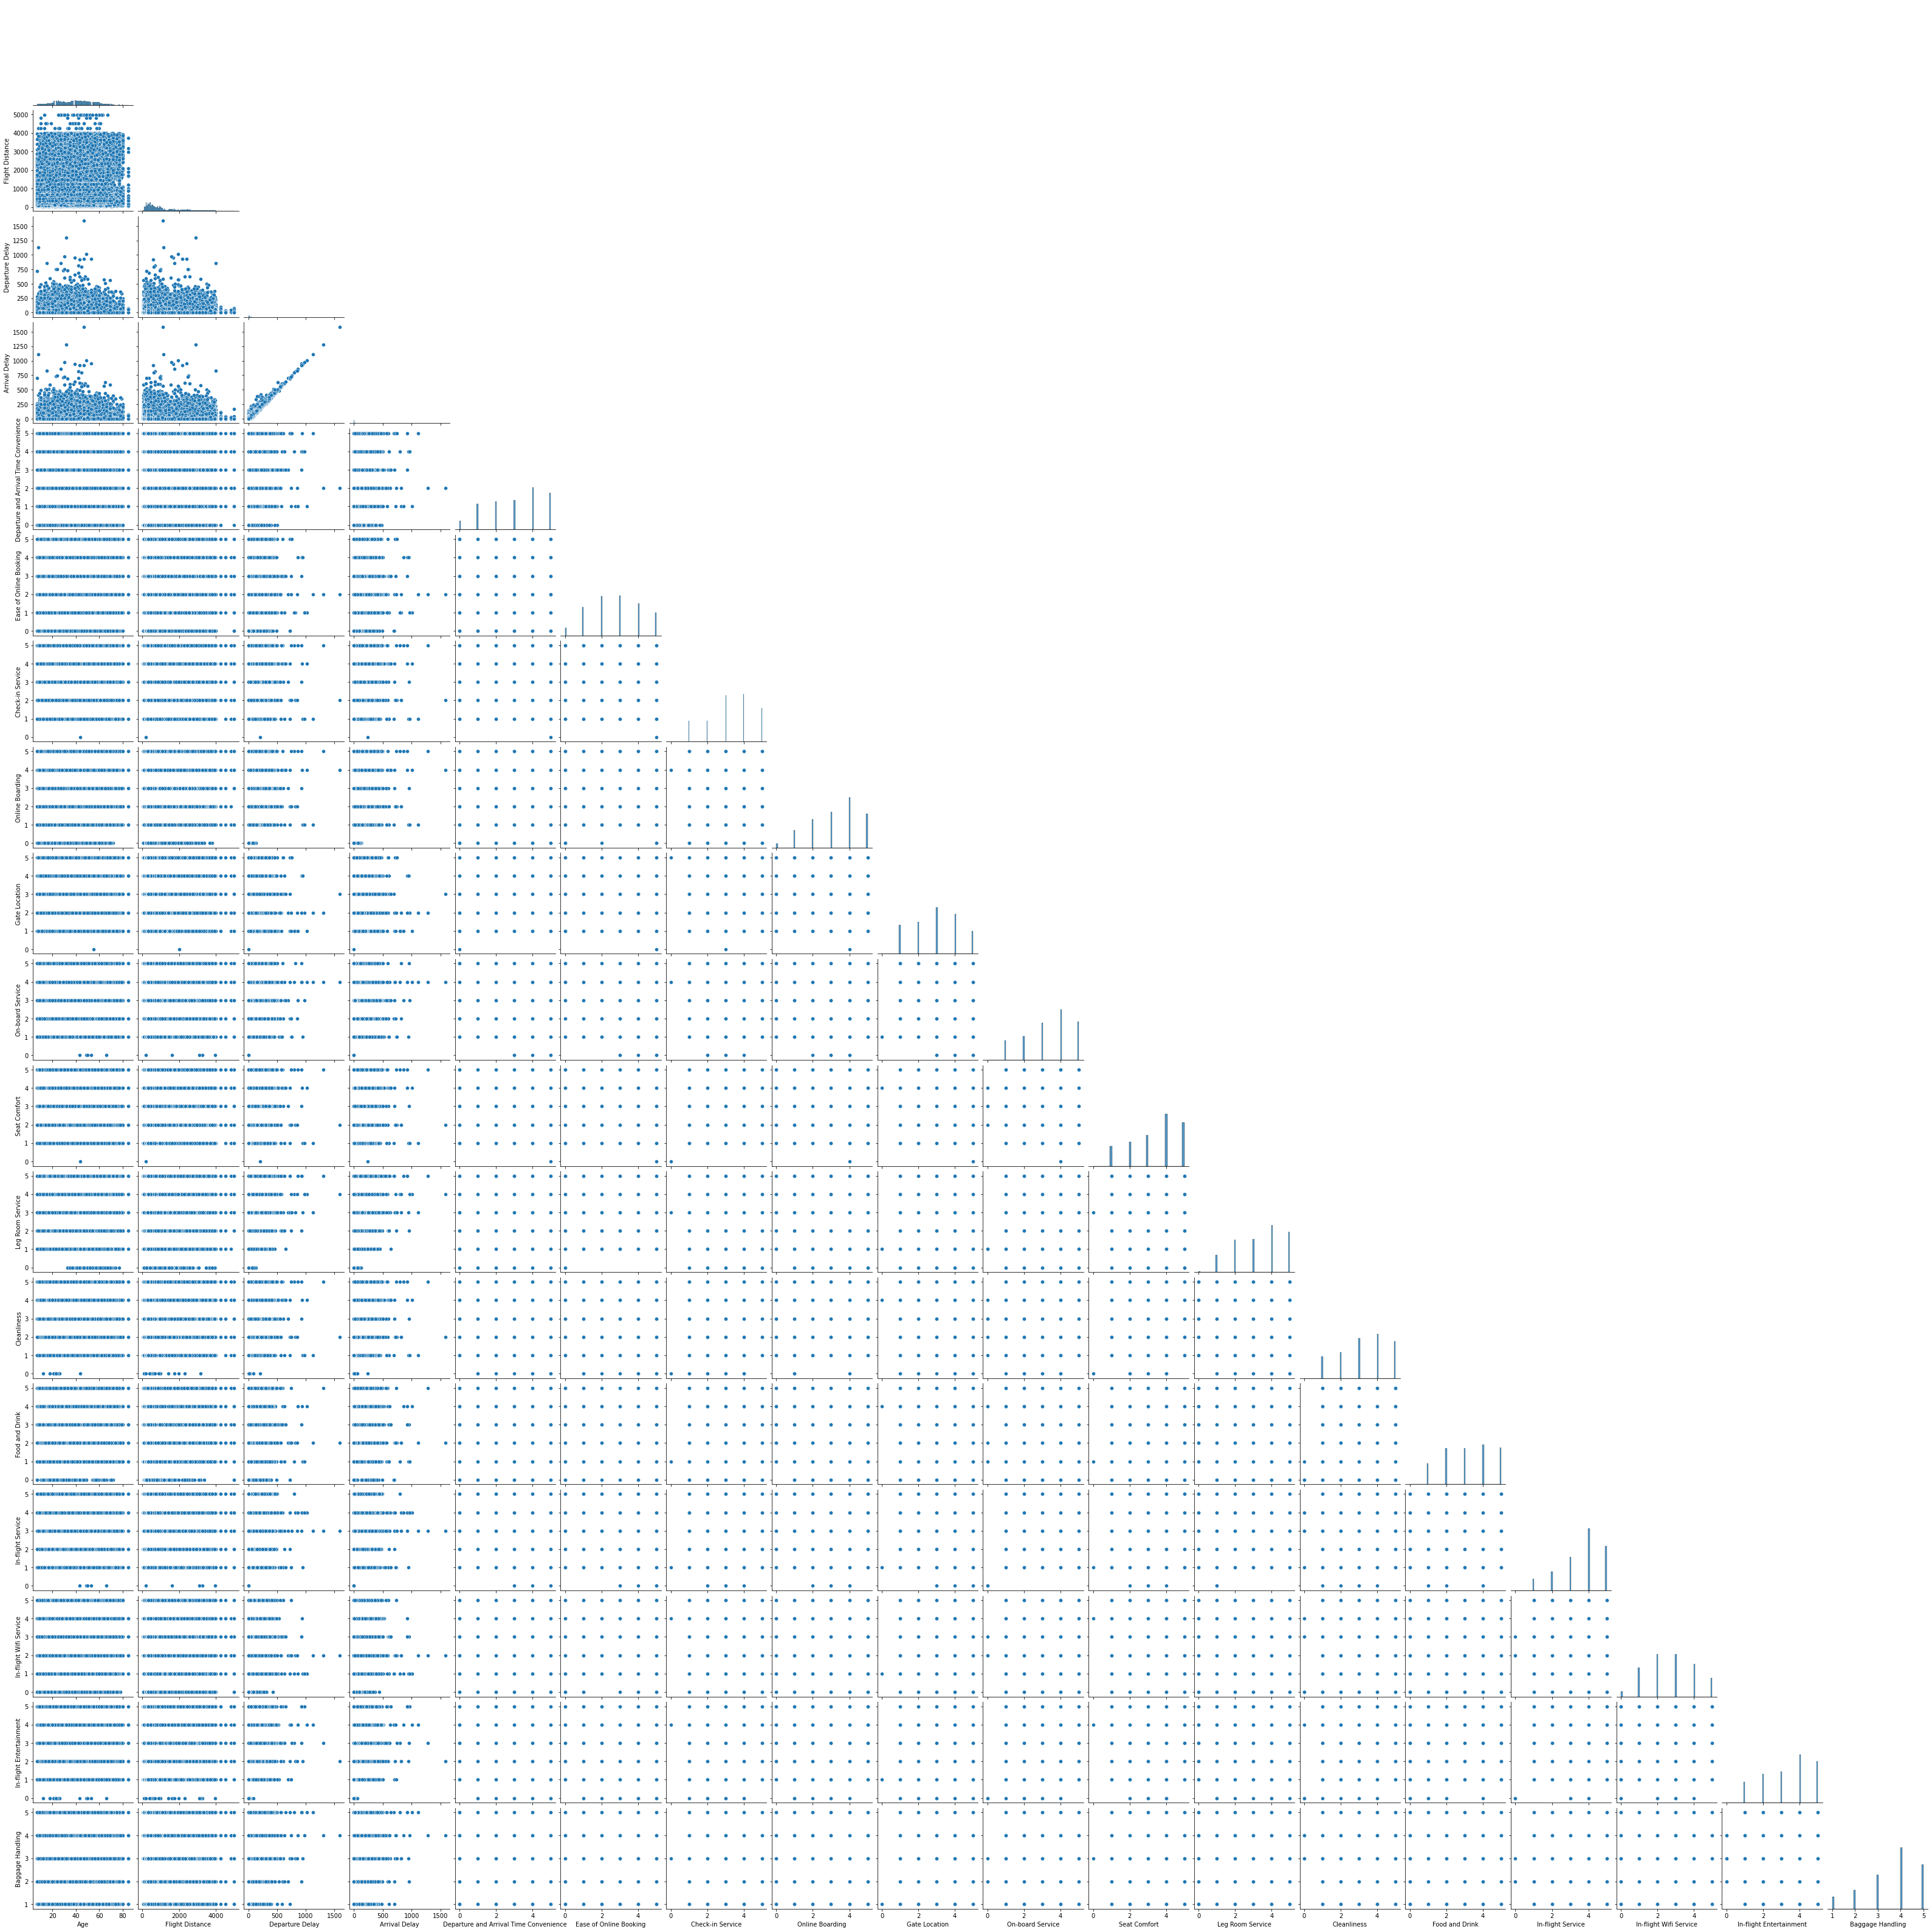

In [10]:
sns.pairplot(df1,corner=True)

In [11]:
df1.columns

Index(['Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

In [12]:
num=['Age','Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling']

In [13]:
k=pd.DataFrame(np.triu(df1.corr()),columns=num,index=num)

In [14]:
k

,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
Age,1.0,0.099863,-0.009263,-0.011248,0.036780,0.022294,0.033182,0.207485,-0.000709,0.056743,0.159229,0.038992,0.052575,0.023283,-0.051778,0.015779,0.074990,-0.048192
Flight Distance,0.0,1.000000,0.001992,-0.001935,-0.018901,0.064959,0.073635,0.215082,0.005378,0.111224,0.157825,0.134548,0.095658,0.057136,0.059182,0.006554,0.130518,0.064810
Departure Delay,0.0,0.000000,1.000000,0.965291,0.000610,-0.005330,-0.018632,-0.019319,0.005943,-0.030471,-0.027711,0.014339,-0.014553,-0.029351,-0.054329,-0.016046,-0.027166,-0.004425
Arrival Delay,0.0,0.000000,0.000000,1.000000,-0.000942,-0.007033,-0.021705,-0.022730,0.005658,-0.034789,-0.030521,0.011346,-0.016546,-0.031715,-0.059853,-0.017749,-0.030230,-0.007935
Departure and Arrival Time Convenience,0.0,0.000000,0.000000,0.000000,1.000000,0.437697,0.091217,0.072175,0.447411,0.067046,0.008707,0.010634,0.010021,0.001057,0.072166,0.344846,-0.008189,0.070646
Ease of Online Booking,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.008835,0.404944,0.460155,0.039039,0.028602,0.109341,0.015150,0.030638,0.035356,0.714888,0.046669,0.039215
Check-in Service,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.204215,-0.039294,0.244620,0.189838,0.152715,0.176611,0.085103,0.237737,0.043847,0.119664,0.234732
Online Boarding,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.002579,0.154272,0.419169,0.123149,0.329331,0.233524,0.073973,0.457422,0.284008,0.083563
Gate Location,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.029109,0.002493,-0.005146,-0.006066,-0.002825,0.000337,0.338547,0.002751,0.001097
On-board Service,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.130654,0.357877,0.122208,0.057476,0.551460,0.120028,0.418863,0.520400


In [15]:
c=[]
for i in num:
    for j in num:
        if((k.loc[j,i]<1) & (k.loc[j,i]>=0.6)):
            print(j,i)
            c.append((i,j))       

Departure Delay Arrival Delay
Seat Comfort Cleanliness
Cleanliness Food and Drink
Ease of Online Booking In-flight Wifi Service
Seat Comfort In-flight Entertainment
Cleanliness In-flight Entertainment
Food and Drink In-flight Entertainment
In-flight Service Baggage Handling


In [16]:
c

[('Arrival Delay', 'Departure Delay'),
 ('Cleanliness', 'Seat Comfort'),
 ('Food and Drink', 'Cleanliness'),
 ('In-flight Wifi Service', 'Ease of Online Booking'),
 ('In-flight Entertainment', 'Seat Comfort'),
 ('In-flight Entertainment', 'Cleanliness'),
 ('In-flight Entertainment', 'Food and Drink'),
 ('Baggage Handling', 'In-flight Service')]

In [17]:
#separately checking scatterplots for those relationships who has correlation coefficents greater than 0.6
#they are(In-flight Wifi Service,Ease of Online Booking),(Cleanliness,Seat Comfort),(In-flight Entertainment,Seat Comfort)
#(Cleanliness,In-flight Entertainment),(In-flight Service,Baggage Handling),(Departure Delay,Arrival Delay)

In [18]:
def scatter(s):
    sns.lmplot(x=s[0],y=s[1],data=df1,hue="Satisfaction",aspect=3)

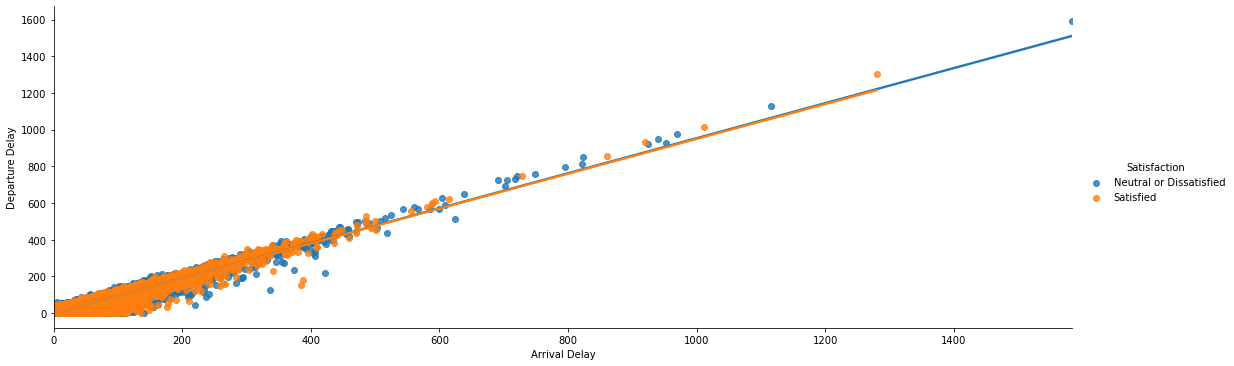

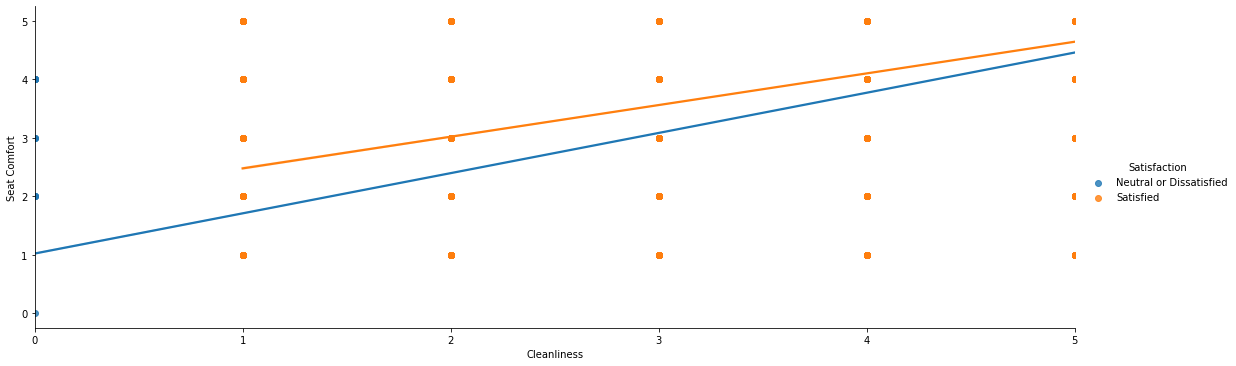

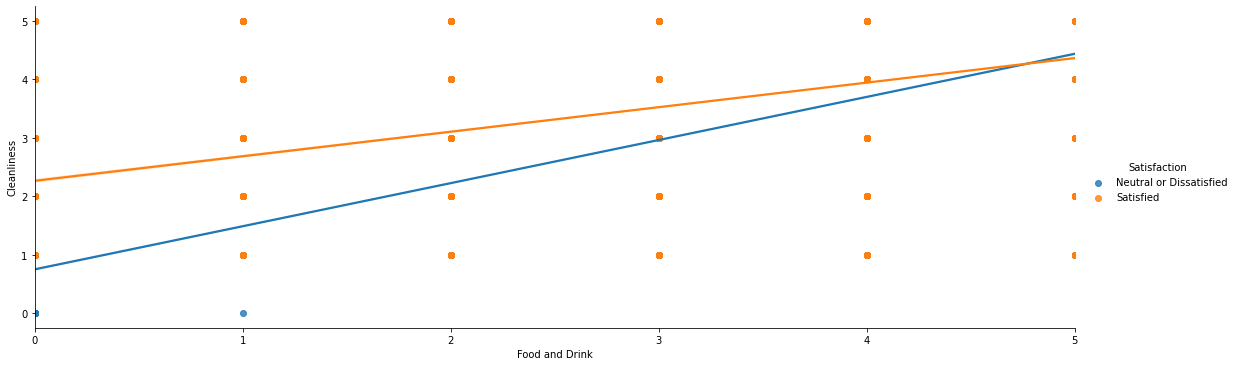

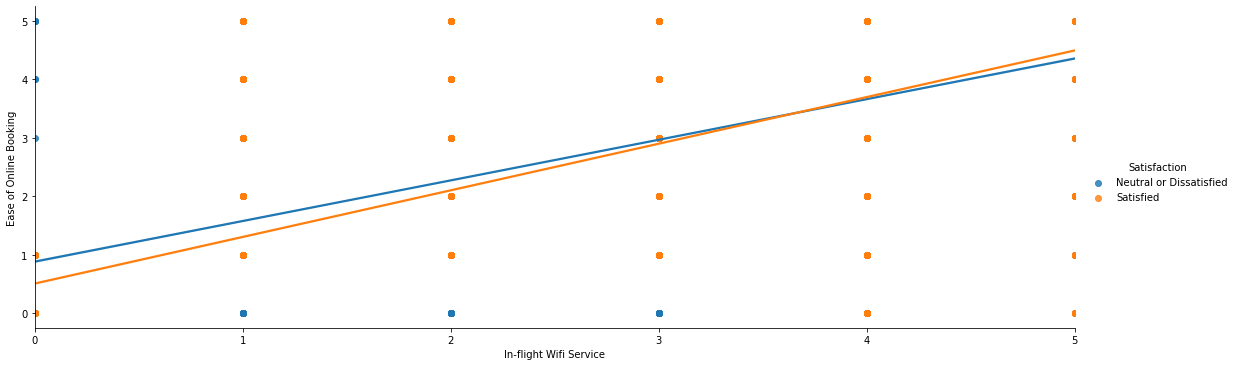

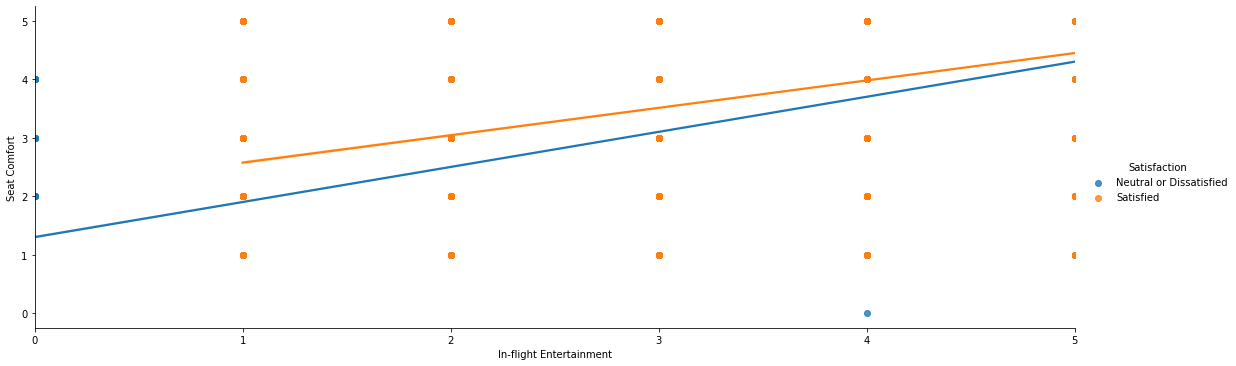

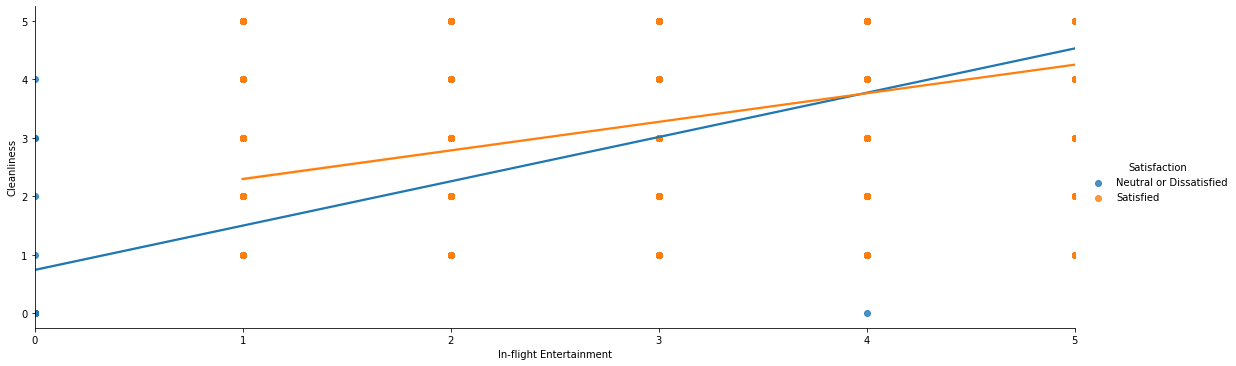

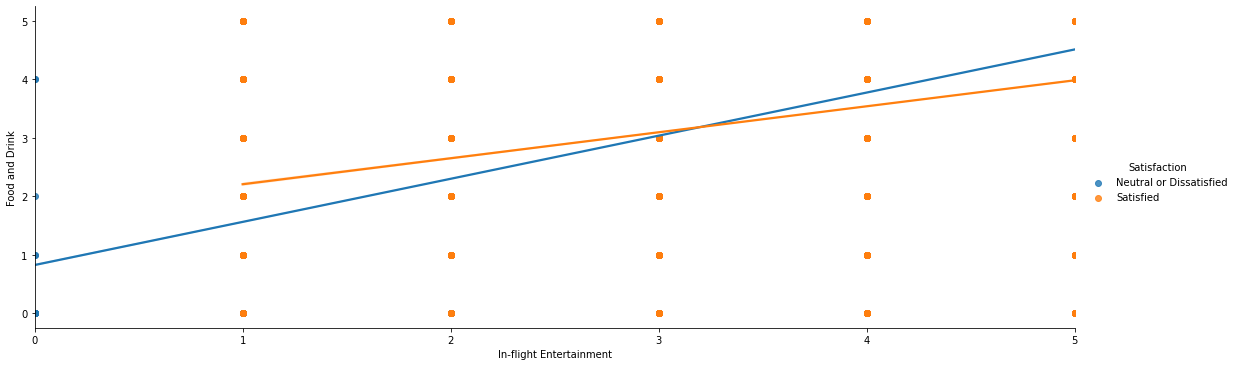

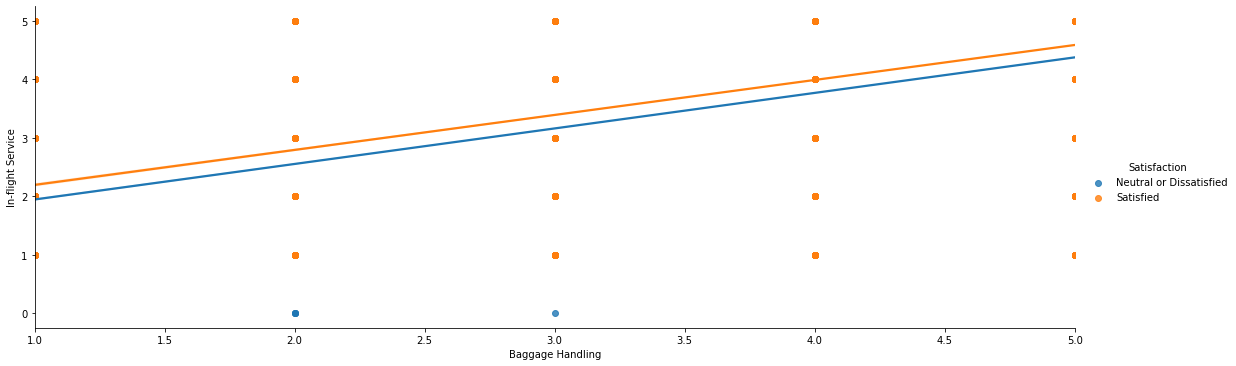

In [19]:
for i in c:
    scatter(i)

In [20]:
df1.Satisfaction.value_counts()

Neutral or Dissatisfied    73225
Satisfied                  56262
Name: Satisfaction, dtype: int64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Satisfaction', ylabel='count'>

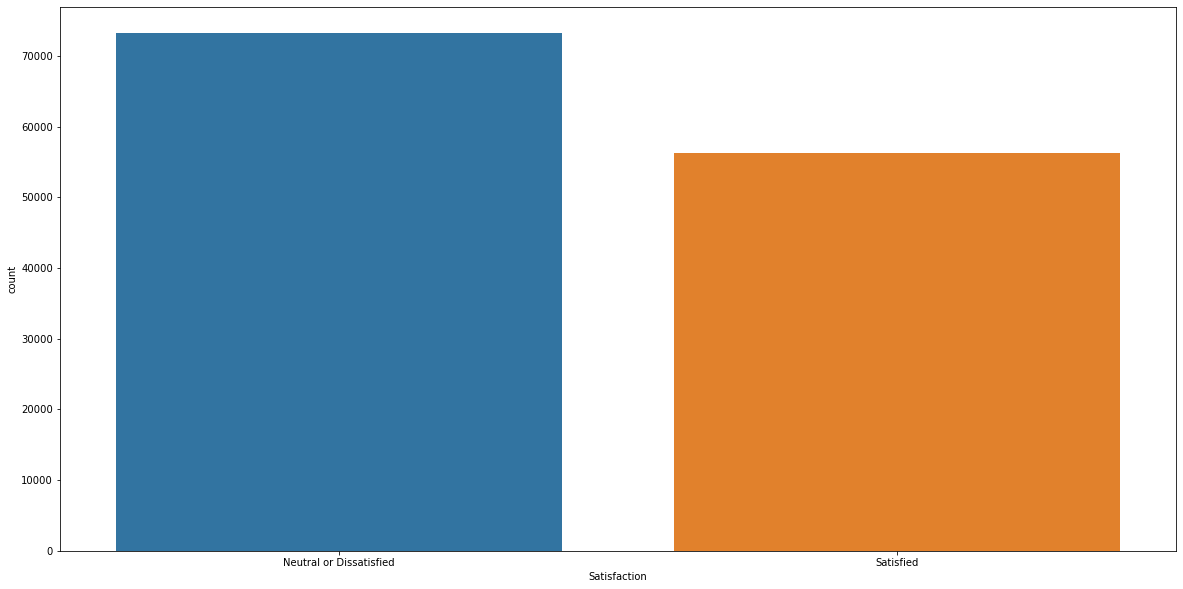

In [21]:
sns.countplot(df1.Satisfaction)

<AxesSubplot:xlabel='Age', ylabel='Count'>

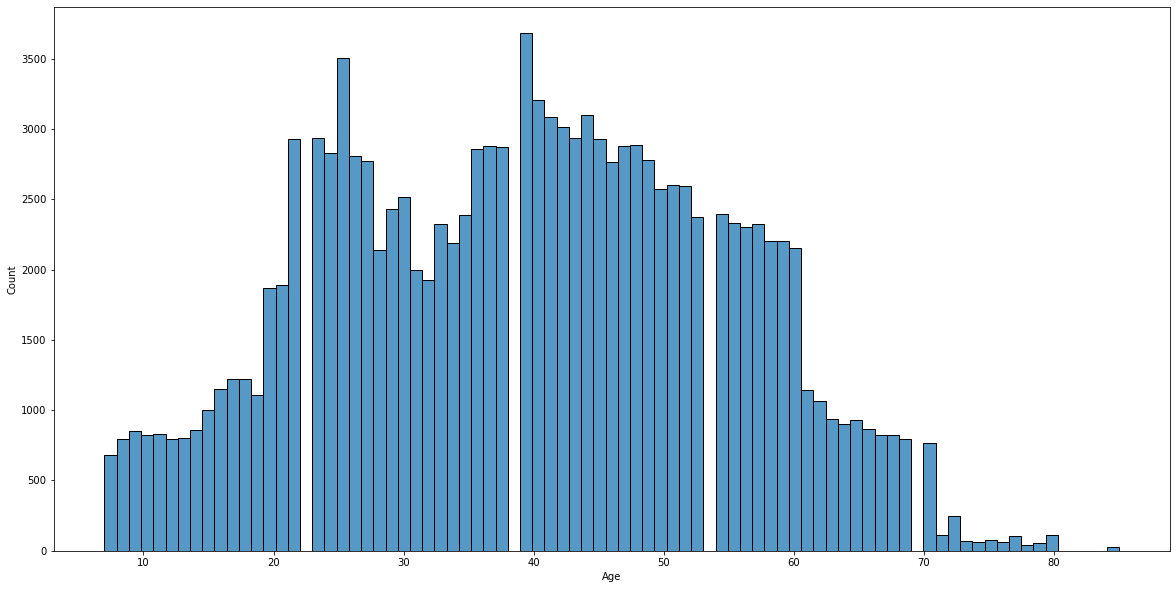

In [22]:
sns.histplot(df1.Age)

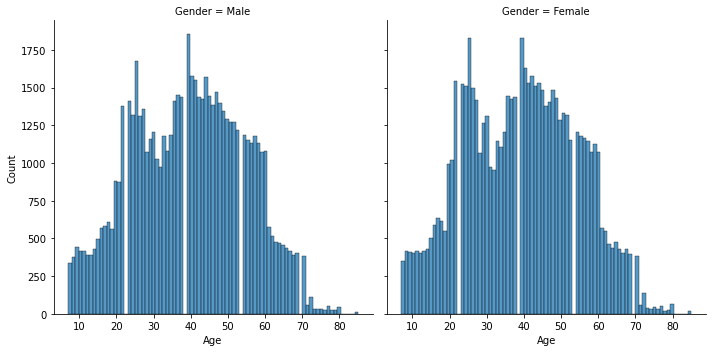

In [23]:
sns.displot(x="Age",data=df1,col="Gender",kind="hist")

In [24]:
df1["Customer Type"].value_counts()

Returning     105773
First-time     23714
Name: Customer Type, dtype: int64

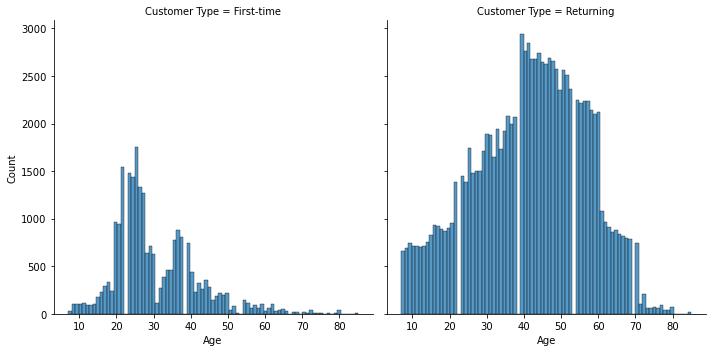

In [25]:
sns.displot(x="Age",data=df1,col="Customer Type",kind="hist")

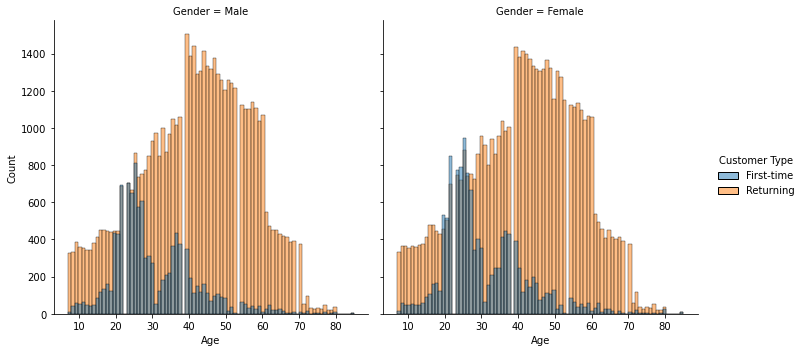

In [26]:
sns.displot(x="Age",data=df1,col="Gender",kind="hist",hue="Customer Type")

In [27]:
df1["Type of Travel"].value_counts()

Business    89445
Personal    40042
Name: Type of Travel, dtype: int64

In [28]:
df1["Class"].value_counts()

Business        61990
Economy         58117
Economy Plus     9380
Name: Class, dtype: int64

In [29]:
pd.crosstab(df1["Gender"],df.Satisfaction)

Satisfaction,Neutral or Dissatisfied,Satisfied
Gender,,
Female,37524,28179
Male,35701,28083


In [30]:
#Creating crosstabs
def crosstab_plot(a):
    (pd.crosstab(df1[a],df.Satisfaction,normalize="index")*100).plot(kind="bar",stacked=True)
    plt.title(a)

In [31]:
df1.columns

Index(['Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

In [32]:
cat=['Gender','Customer Type', 'Type of Travel', 'Class','Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling',]

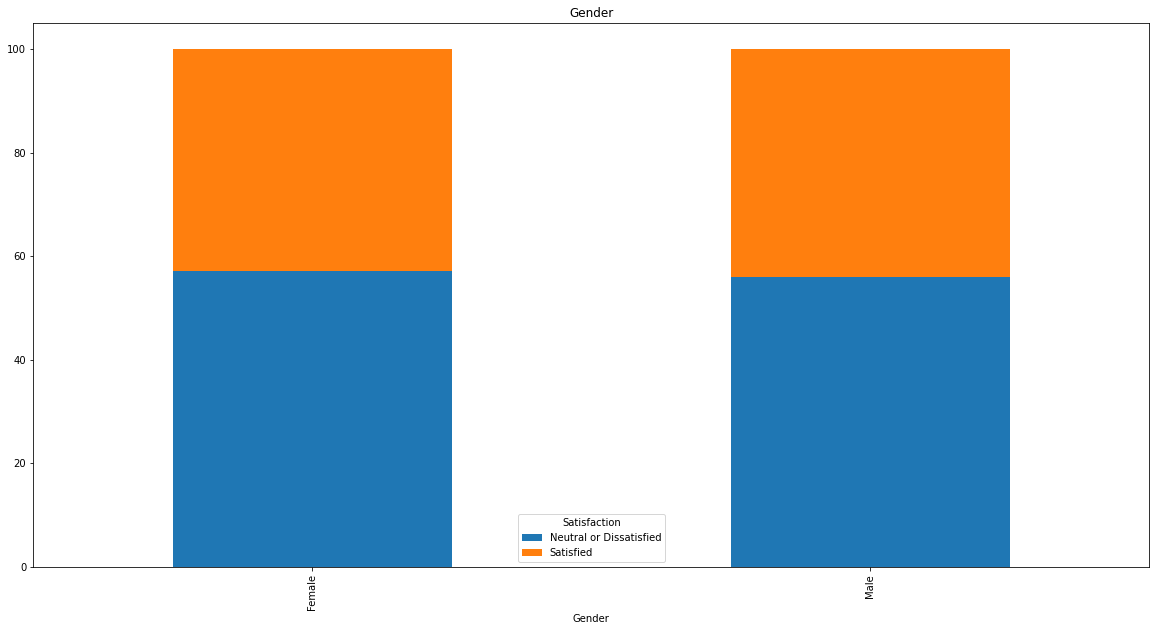

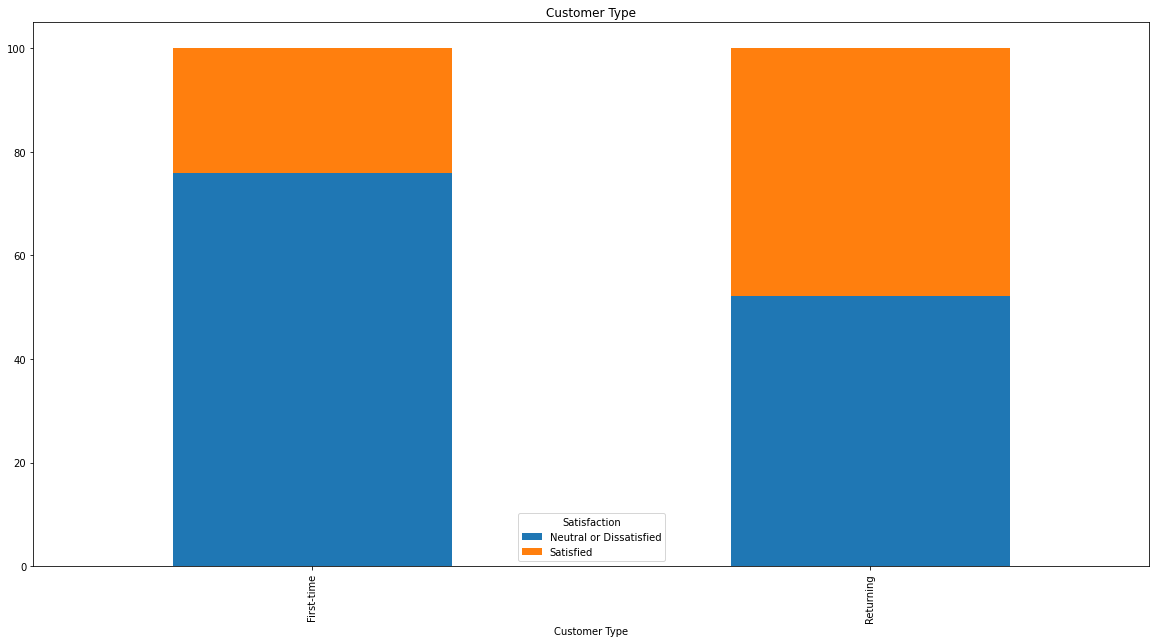

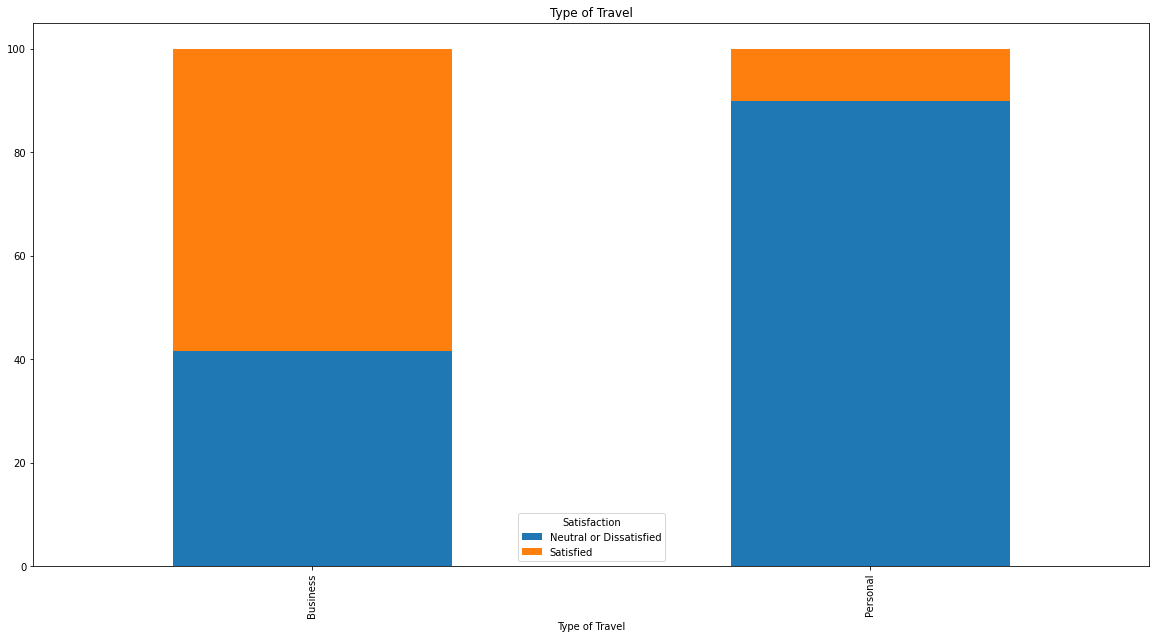

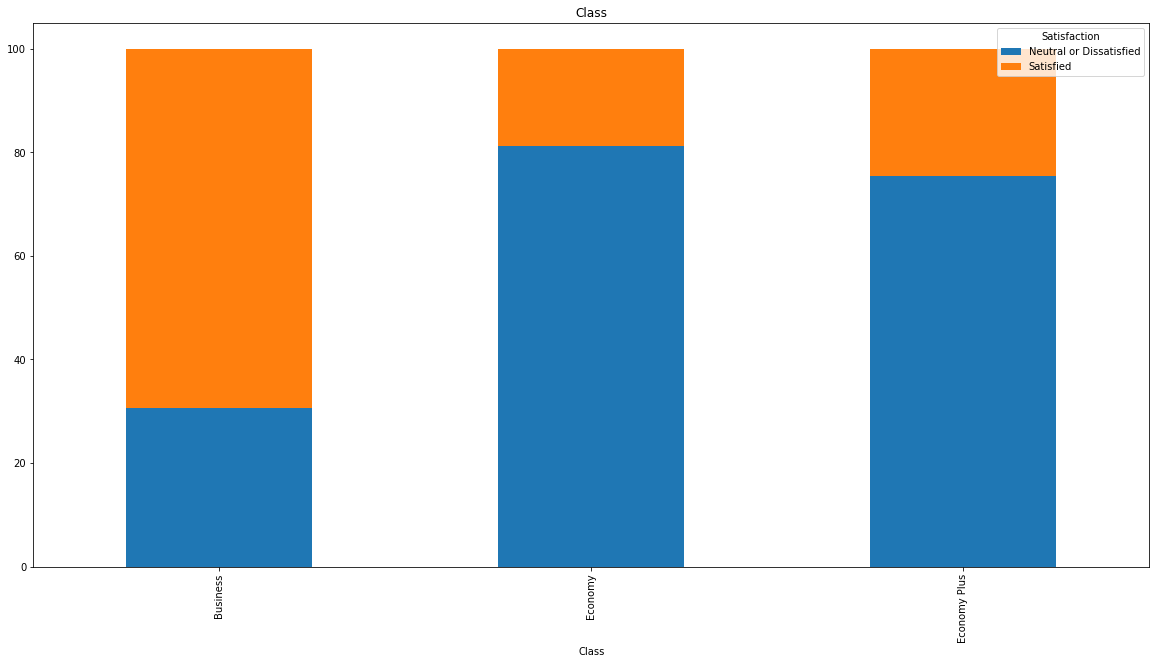

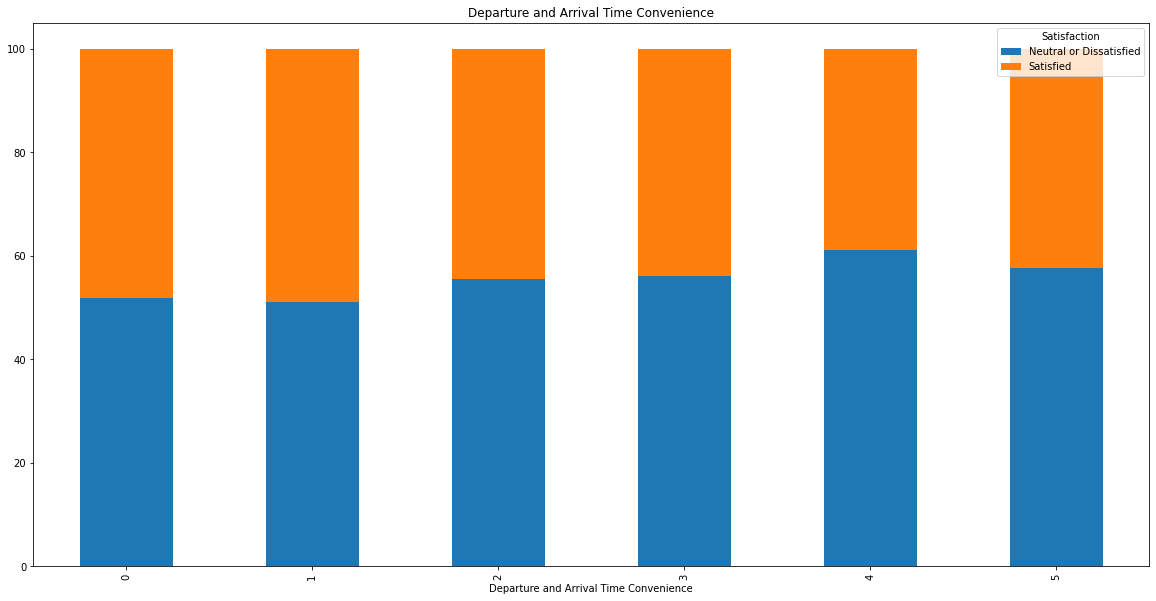

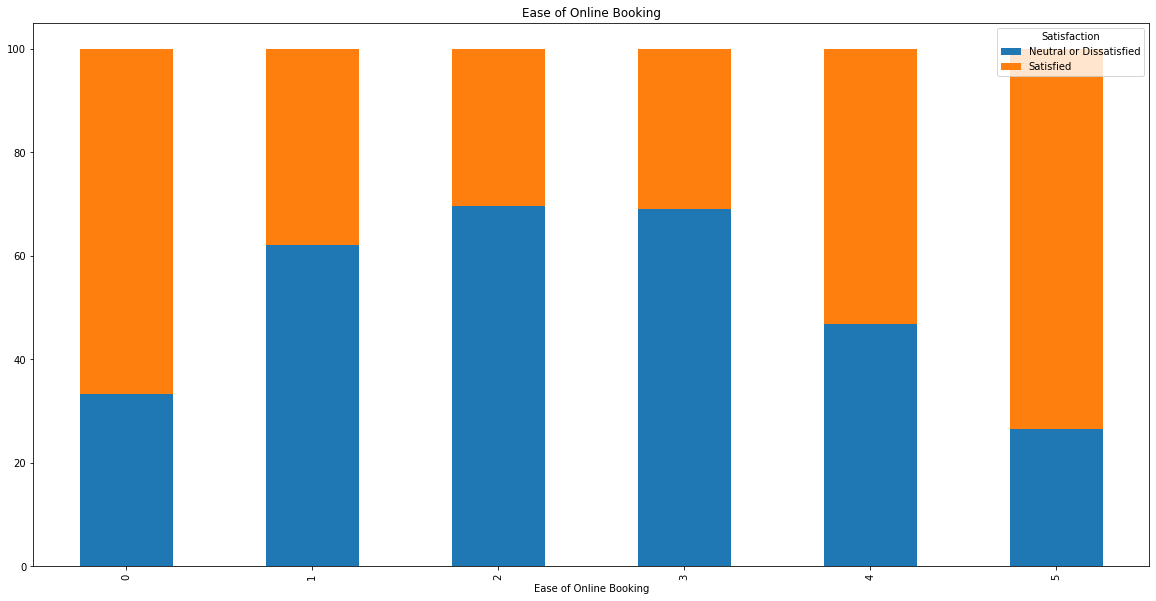

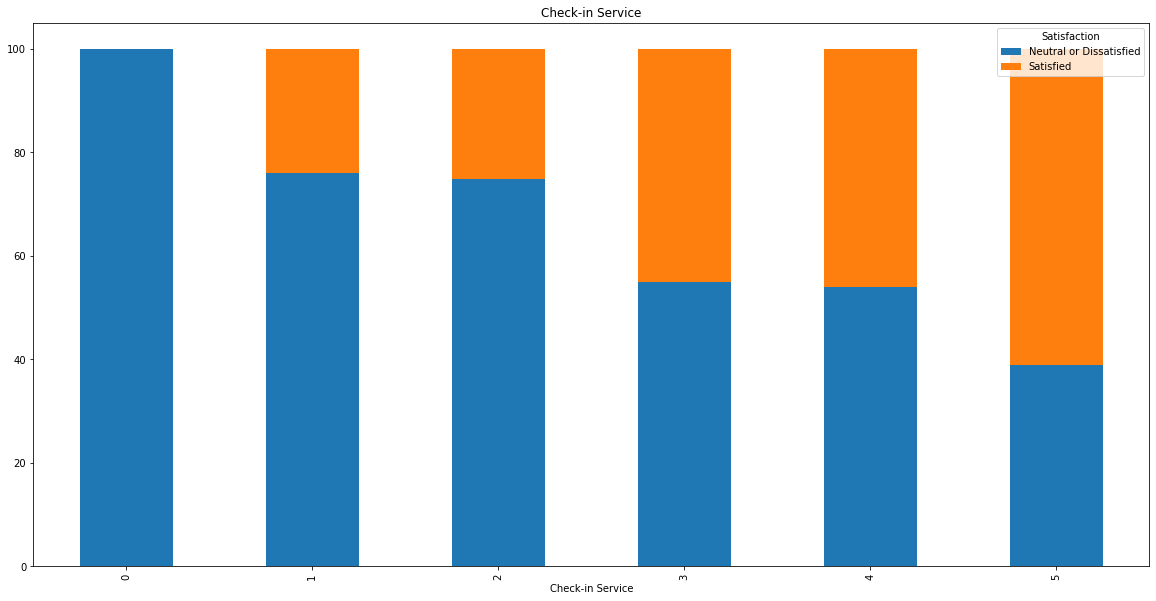

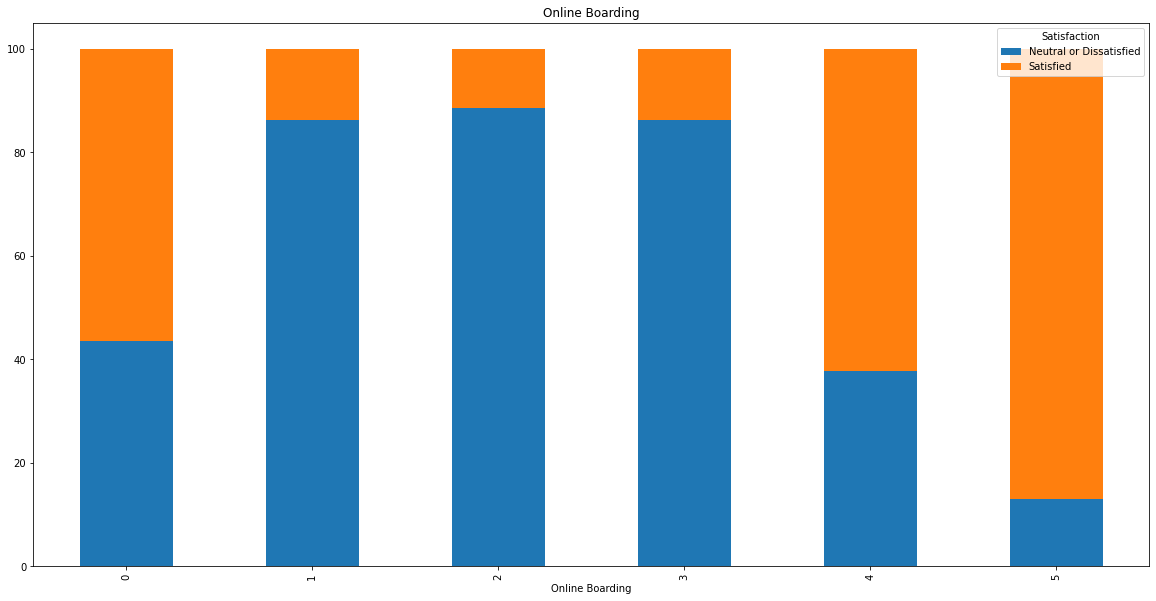

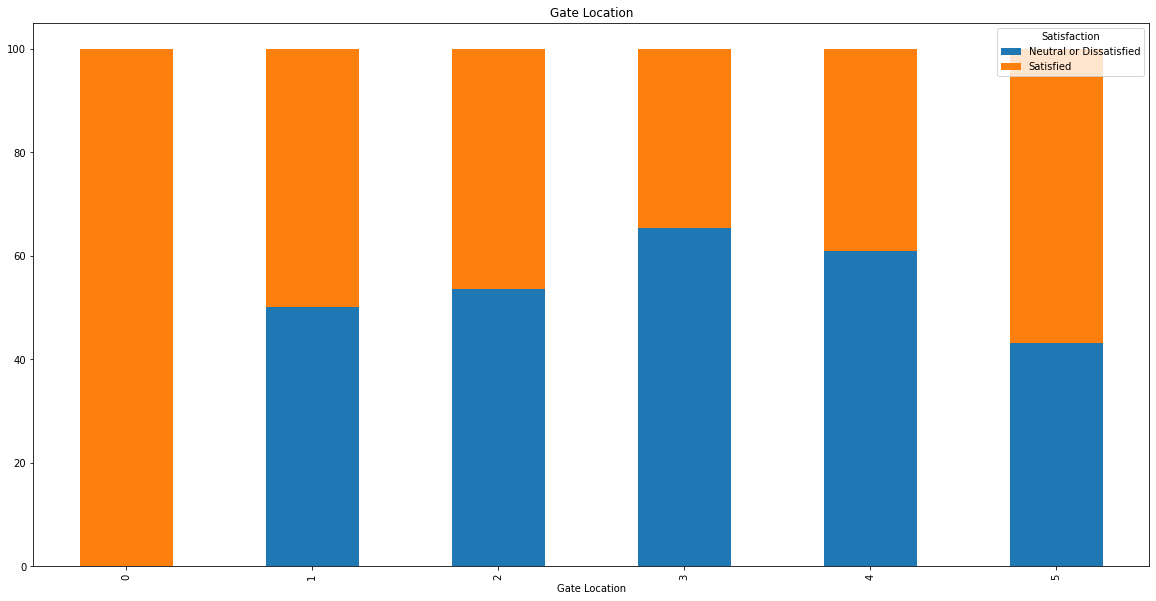

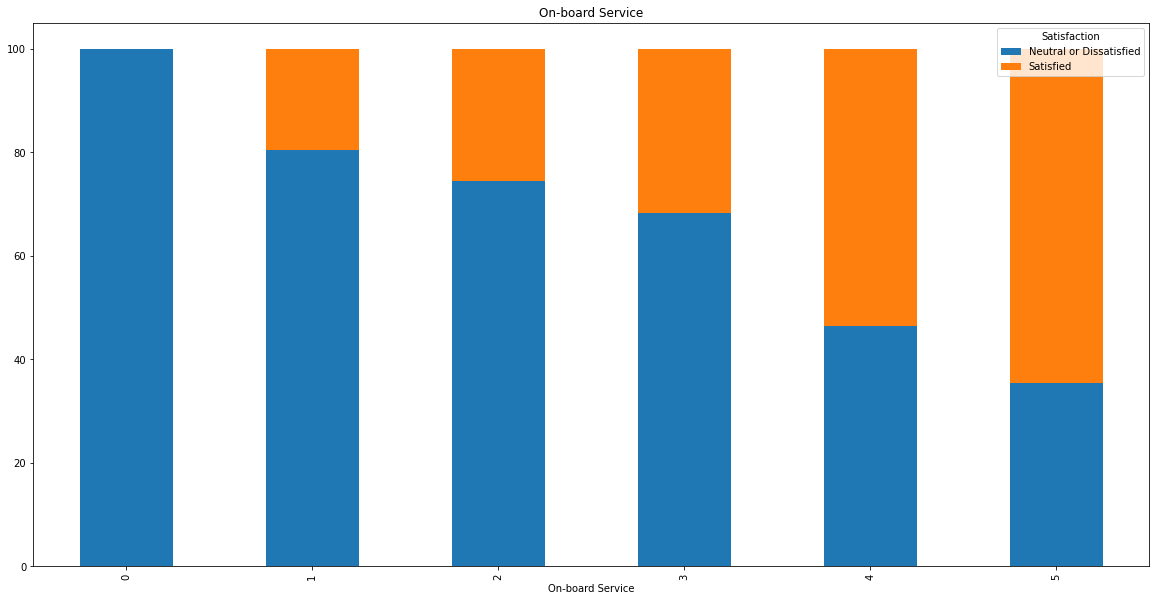

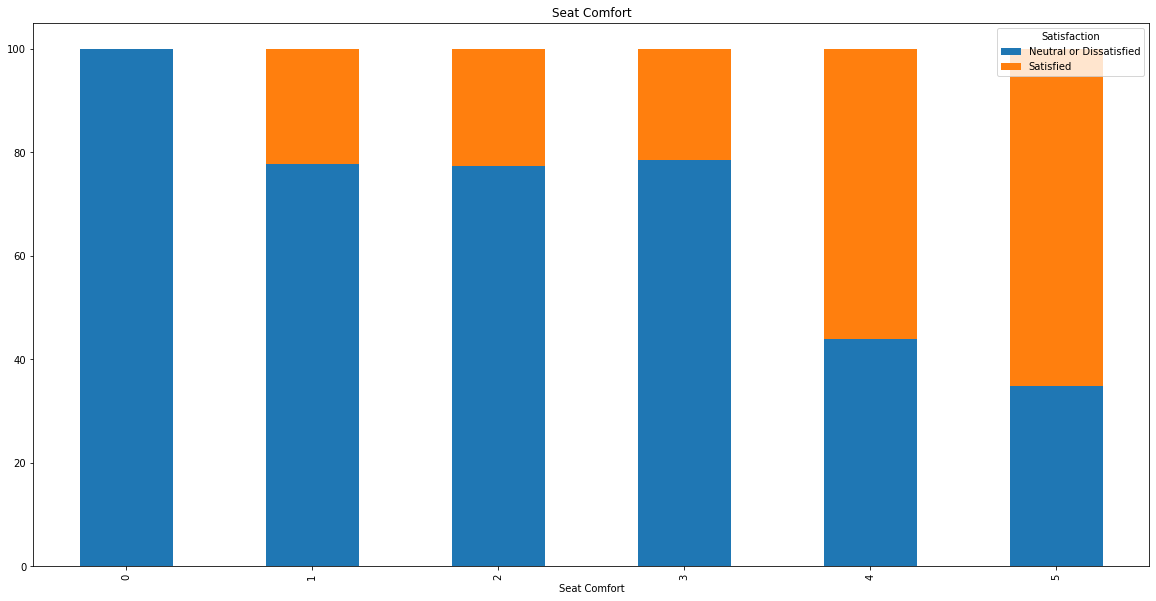

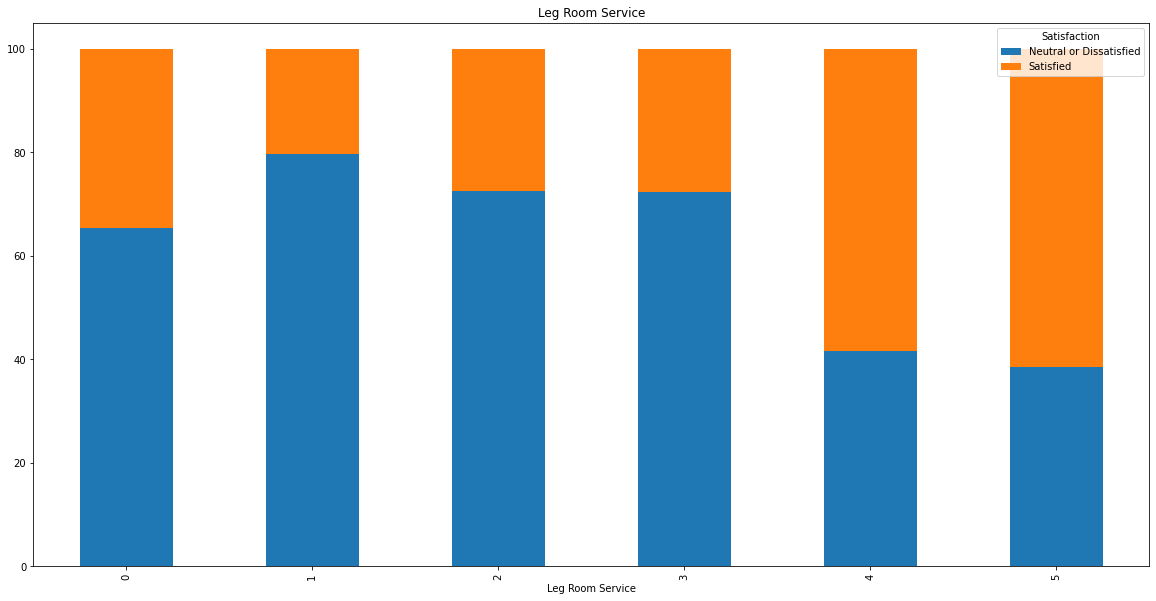

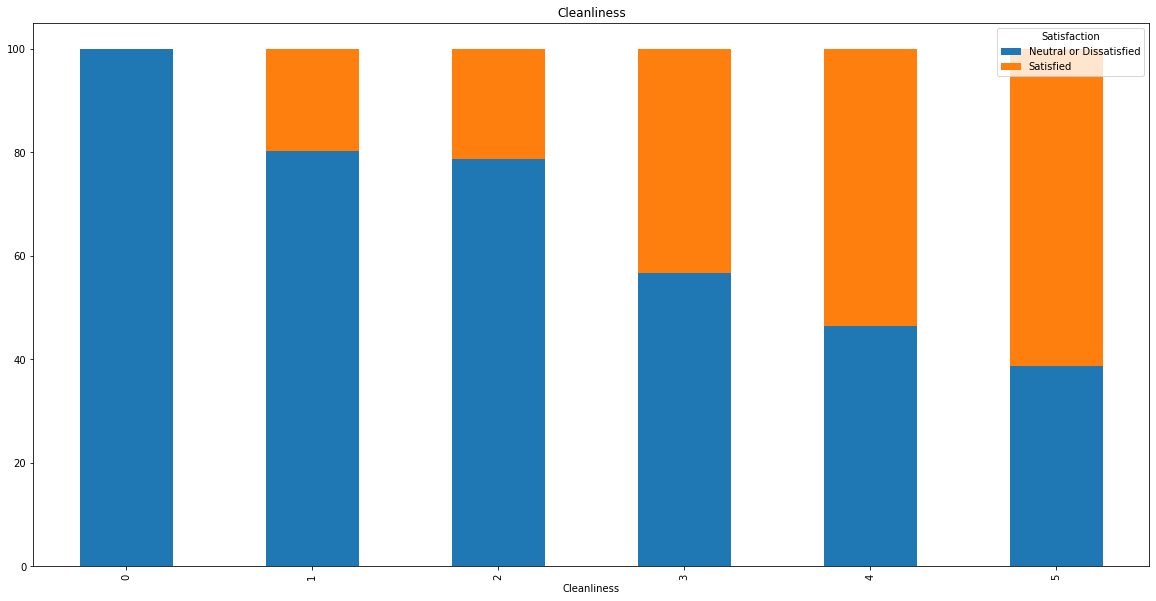

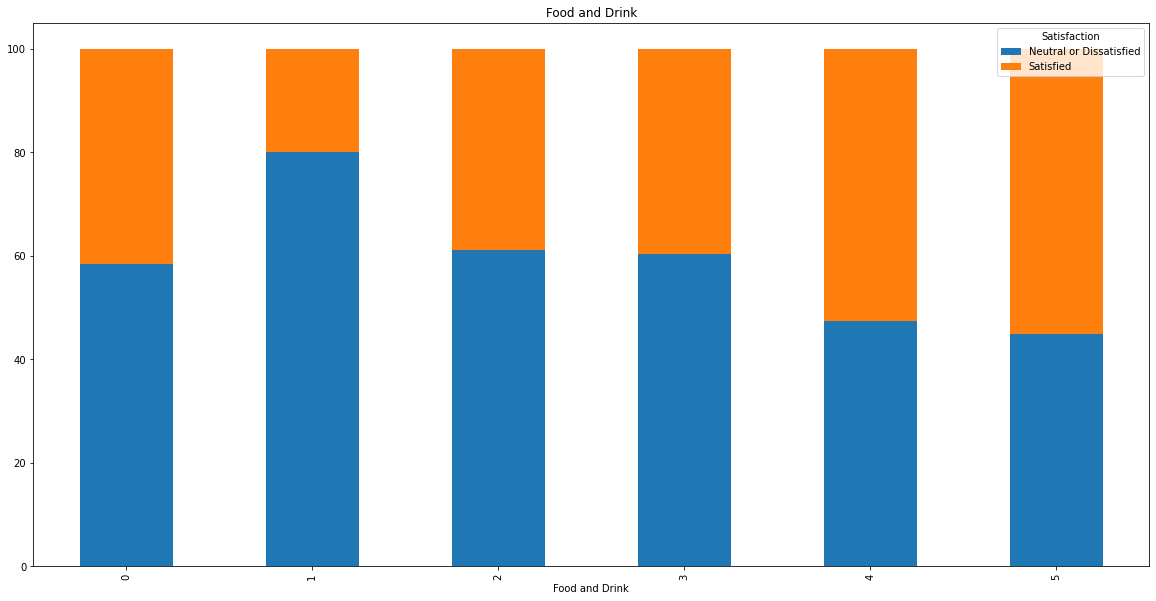

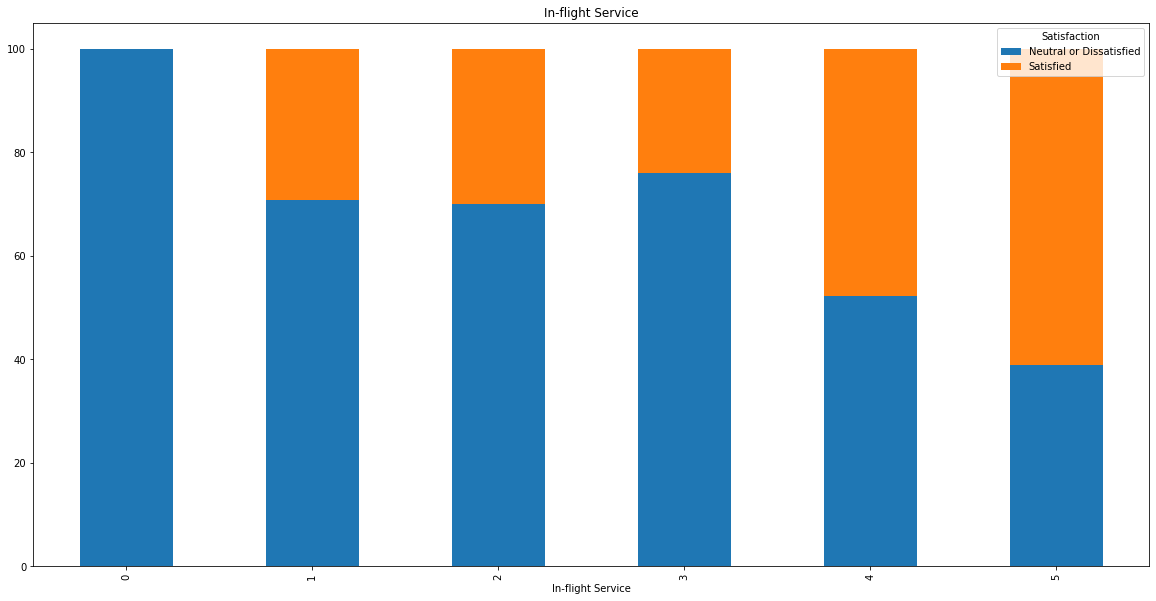

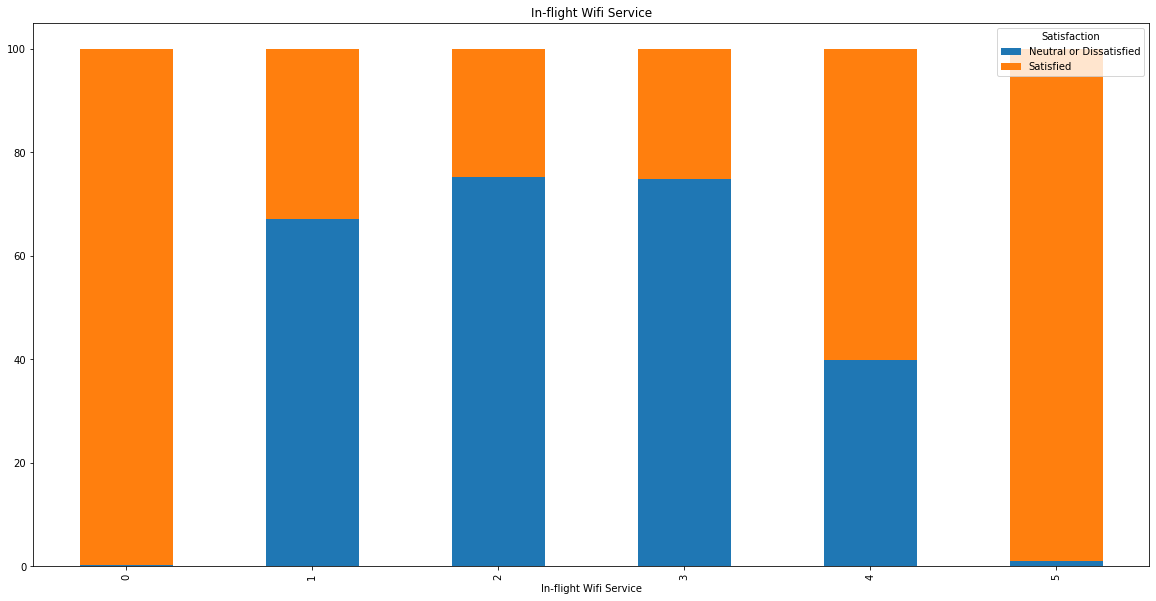

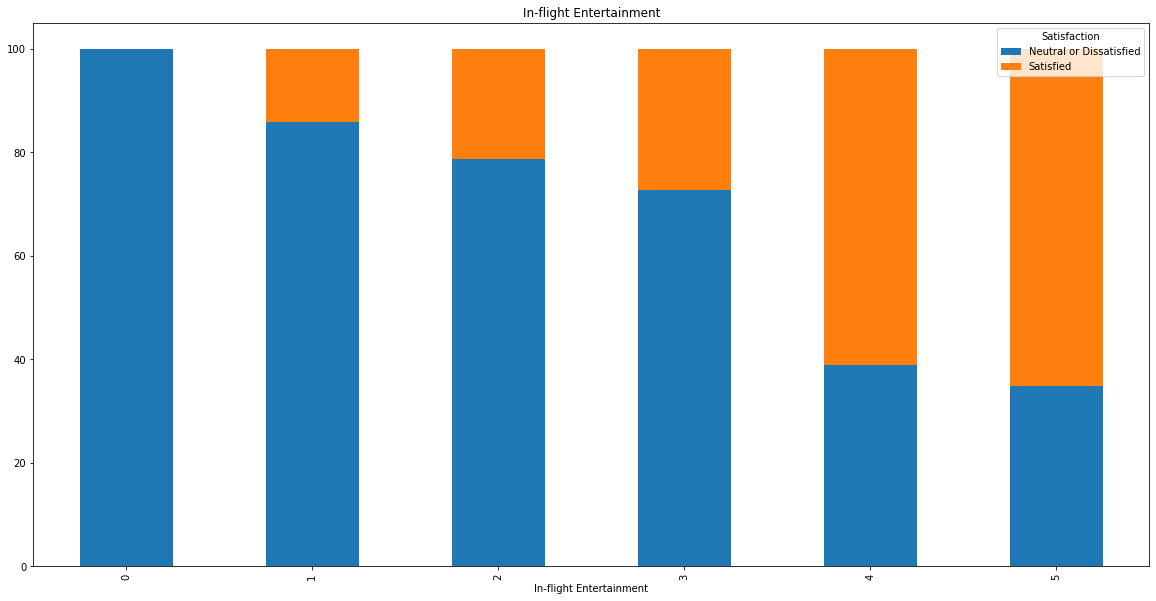

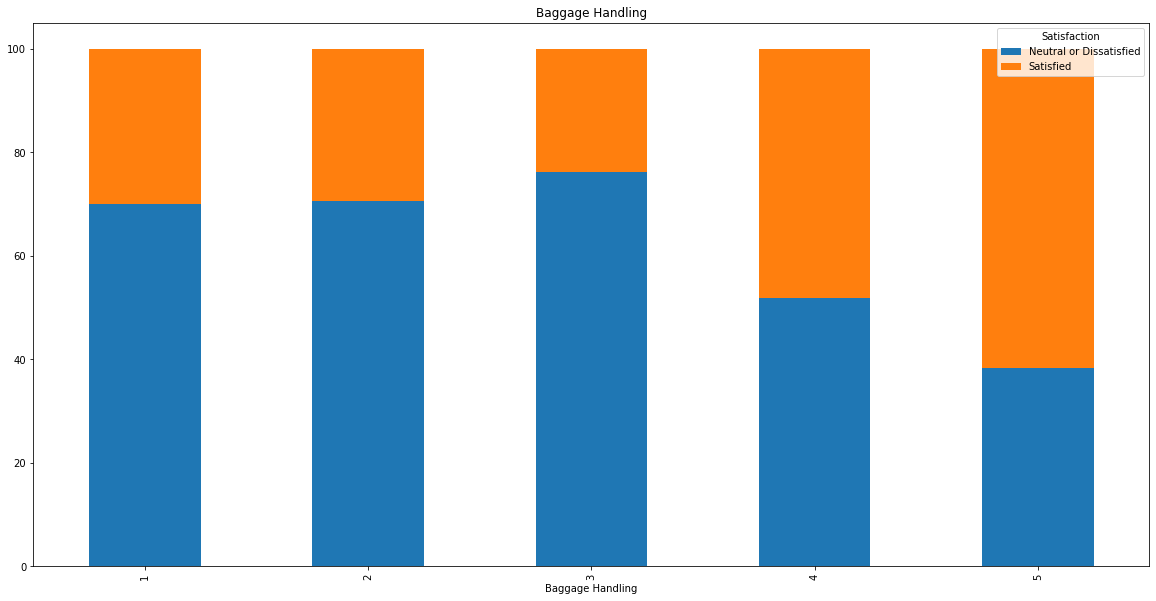

In [33]:
for i in cat:
    crosstab_plot(i)

# Chi Square Test

In [34]:
from scipy.stats import chi2_contingency

In [35]:
def chi_square(crosstab):
    stat, p, dof, expected = chi2_contingency(crosstab)
    print(p)

In [36]:
for i in cat:
    print(i)
    ct=pd.crosstab(df1[i],df1["Satisfaction"])
    chi_square(ct)

Gender
3.608854694610591e-05
Customer Type
0.0
Type of Travel
0.0
Class
0.0
Departure and Arrival Time Convenience
2.473802119547831e-127
Ease of Online Booking
0.0
Check-in Service
0.0
Online Boarding
0.0
Gate Location
0.0
On-board Service
0.0
Seat Comfort
0.0
Leg Room Service
0.0
Cleanliness
0.0
Food and Drink
0.0
In-flight Service
0.0
In-flight Wifi Service
0.0
In-flight Entertainment
0.0
Baggage Handling
0.0


# Checking whether T-test gives us the same result for the ratings features

In [37]:
r=['Flight Distance', 'Departure Delay', 'Arrival Delay','Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling']

In [38]:
from scipy import stats

In [39]:
w=df1.groupby("Satisfaction")

In [40]:
for i in r:
    print(f"FOR {i}")
    a=w.get_group("Neutral or Dissatisfied")[i]
    b=w.get_group("Satisfied")[i]
    print(stats.ttest_ind(a,b))

FOR Flight Distance
Ttest_indResult(statistic=-112.42138166525957, pvalue=0.0)
FOR Departure Delay
Ttest_indResult(statistic=18.387156276650156, pvalue=2.0778850593162206e-75)
FOR Arrival Delay
Ttest_indResult(statistic=21.00542086762015, pvalue=8.528258536769457e-98)
FOR Departure and Arrival Time Convenience
Ttest_indResult(statistic=19.624764842502955, pvalue=1.2663838574479681e-85)
FOR Ease of Online Booking
Ttest_indResult(statistic=-61.58944329947426, pvalue=0.0)
FOR Check-in Service
Ttest_indResult(statistic=-87.84037251121532, pvalue=0.0)
FOR Online Boarding
Ttest_indResult(statistic=-208.65298447941947, pvalue=0.0)
FOR Gate Location
Ttest_indResult(statistic=1.0517392633445433, pvalue=0.29292115444636097)
FOR On-board Service
Ttest_indResult(statistic=-122.52653044875035, pvalue=0.0)
FOR Seat Comfort
Ttest_indResult(statistic=-133.82509124942223, pvalue=0.0)
FOR Leg Room Service
Ttest_indResult(statistic=-118.40268895026624, pvalue=0.0)
FOR Cleanliness
Ttest_indResult(statisti

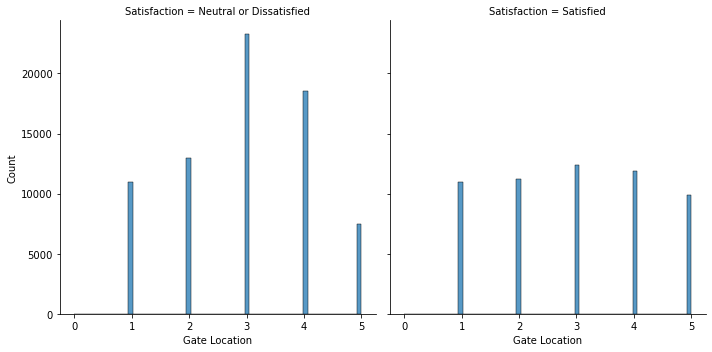

In [41]:
sns.displot(x="Gate Location",data=df1,col="Satisfaction")

In [42]:
df1.columns

Index(['Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

In [43]:
cat=['Gender','Customer Type', 'Type of Travel', 'Class']
cont=['Age','Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling']

# Checking linear and non-linear dependency

In [44]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler

In [45]:
from itertools import combinations
c=list(combinations(cont,2))
c

[('Age', 'Flight Distance'),
 ('Age', 'Departure Delay'),
 ('Age', 'Arrival Delay'),
 ('Age', 'Departure and Arrival Time Convenience'),
 ('Age', 'Ease of Online Booking'),
 ('Age', 'Check-in Service'),
 ('Age', 'Online Boarding'),
 ('Age', 'Gate Location'),
 ('Age', 'On-board Service'),
 ('Age', 'Seat Comfort'),
 ('Age', 'Leg Room Service'),
 ('Age', 'Cleanliness'),
 ('Age', 'Food and Drink'),
 ('Age', 'In-flight Service'),
 ('Age', 'In-flight Wifi Service'),
 ('Age', 'In-flight Entertainment'),
 ('Age', 'Baggage Handling'),
 ('Flight Distance', 'Departure Delay'),
 ('Flight Distance', 'Arrival Delay'),
 ('Flight Distance', 'Departure and Arrival Time Convenience'),
 ('Flight Distance', 'Ease of Online Booking'),
 ('Flight Distance', 'Check-in Service'),
 ('Flight Distance', 'Online Boarding'),
 ('Flight Distance', 'Gate Location'),
 ('Flight Distance', 'On-board Service'),
 ('Flight Distance', 'Seat Comfort'),
 ('Flight Distance', 'Leg Room Service'),
 ('Flight Distance', 'Cleanlines

In [46]:
from sklearn.model_selection import cross_val_score
score_d={}
for i in c:
    dt=DecisionTreeRegressor()
    X=df1[i[0]].values.reshape(-1,1)
    y=df1[i[1]].values.reshape(-1,1)
    score=cross_val_score(dt,X,y,cv=6,scoring="r2").mean()
    score_d[i]=score

In [47]:
score_d

{('Age', 'Flight Distance'): 0.014160415614412225,
 ('Age', 'Departure Delay'): -0.004394249588171695,
 ('Age', 'Arrival Delay'): -0.00465445444712335,
 ('Age', 'Departure and Arrival Time Convenience'): 0.012999381561644818,
 ('Age', 'Ease of Online Booking'): 0.0026170612477231145,
 ('Age', 'Check-in Service'): -0.009150233258157262,
 ('Age', 'Online Boarding'): 0.062033644151690825,
 ('Age', 'Gate Location'): -0.0004101708837863094,
 ('Age', 'On-board Service'): 0.005720595497965775,
 ('Age', 'Seat Comfort'): 0.034910595365507356,
 ('Age', 'Leg Room Service'): 0.013005060241508512,
 ('Age', 'Cleanliness'): 0.008453817371646041,
 ('Age', 'Food and Drink'): 0.0028037199803982817,
 ('Age', 'In-flight Service'): -0.011905732082849415,
 ('Age', 'In-flight Wifi Service'): 0.0011560643269301434,
 ('Age', 'In-flight Entertainment'): 0.01878905501617813,
 ('Age', 'Baggage Handling'): -0.009583185999608834,
 ('Flight Distance', 'Departure Delay'): -0.11656183160233347,
 ('Flight Distance', 'A

In [48]:
k=dict(sorted(score_d.items(),key=lambda x:x[1],reverse=True))
for i in k:
    print(i,k[i])


('Departure Delay', 'Arrival Delay') 0.9280936653013977
('Ease of Online Booking', 'In-flight Wifi Service') 0.5135704398722843
('Cleanliness', 'In-flight Entertainment') 0.48373971311671404
('Seat Comfort', 'Cleanliness') 0.4639262925401044
('Cleanliness', 'Food and Drink') 0.43543073397198423
('In-flight Service', 'Baggage Handling') 0.40111237705796493
('Food and Drink', 'In-flight Entertainment') 0.39887964963157296
('Seat Comfort', 'In-flight Entertainment') 0.373472788694611
('Seat Comfort', 'Food and Drink') 0.33263198875740035
('On-board Service', 'In-flight Service') 0.3111565086412417
('On-board Service', 'Baggage Handling') 0.2751859800259097
('Ease of Online Booking', 'Gate Location') 0.2523097260245622
('Departure and Arrival Time Convenience', 'Gate Location') 0.2503026257127901
('Online Boarding', 'In-flight Wifi Service') 0.22395883835315866
('Departure and Arrival Time Convenience', 'Ease of Online Booking') 0.20470557187162175
('Online Boarding', 'Seat Comfort') 0.195

In [49]:
cont

['Age',
 'Flight Distance',
 'Departure Delay',
 'Arrival Delay',
 'Departure and Arrival Time Convenience',
 'Ease of Online Booking',
 'Check-in Service',
 'Online Boarding',
 'Gate Location',
 'On-board Service',
 'Seat Comfort',
 'Leg Room Service',
 'Cleanliness',
 'Food and Drink',
 'In-flight Service',
 'In-flight Wifi Service',
 'In-flight Entertainment',
 'Baggage Handling']

In [50]:
scaled=pd.DataFrame(MinMaxScaler().fit_transform(df1[cont]),columns=cont)
scaled.head()

,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
0,0.525641,0.159532,0.001256,0.003157,0.6,0.6,0.8,0.6,0.6,0.6,1.0,0.4,1.0,1.0,1.0,0.6,1.0,1.0
1,0.358974,0.159532,0.016332,0.024621,0.4,0.4,0.6,1.0,0.4,1.0,0.8,1.0,1.0,0.6,1.0,0.4,1.0,1.0
2,0.435897,0.165994,0.000000,0.000000,0.8,0.8,0.8,1.0,0.8,0.6,1.0,0.6,1.0,1.0,0.6,0.8,0.6,0.5
3,0.551282,0.378433,0.000000,0.000000,0.4,0.4,0.6,0.8,0.4,1.0,1.0,1.0,0.8,0.8,1.0,0.4,1.0,1.0
4,0.538462,0.694467,0.000000,0.000631,0.6,0.6,0.6,1.0,0.6,0.6,0.8,0.8,1.0,0.8,0.6,0.6,0.6,0.5


# Removing irrelevant features

In [51]:
cont

['Age',
 'Flight Distance',
 'Departure Delay',
 'Arrival Delay',
 'Departure and Arrival Time Convenience',
 'Ease of Online Booking',
 'Check-in Service',
 'Online Boarding',
 'Gate Location',
 'On-board Service',
 'Seat Comfort',
 'Leg Room Service',
 'Cleanliness',
 'Food and Drink',
 'In-flight Service',
 'In-flight Wifi Service',
 'In-flight Entertainment',
 'Baggage Handling']

In [52]:
cat

['Gender', 'Customer Type', 'Type of Travel', 'Class']

In [53]:
features_to_replace=[['Arrival Delay', 'Departure Delay'],
['Cleanliness', 'Seat Comfort','Food and Drink','In-flight Entertainment'],
['In-flight Wifi Service', 'Ease of Online Booking'],
['Baggage Handling', 'In-flight Service']]

In [54]:
df_r=pd.DataFrame()
c=1
for i in features_to_replace:
    df_r[c]=df1[i].mean(axis=1)
    c=c+1

In [55]:
df_r

,1,2,3,4
0,3.5,5.00,3.0,5.0
1,32.5,4.25,2.0,5.0
2,0.0,4.50,4.0,3.0
3,0.0,4.50,2.0,5.0
4,0.5,4.00,3.0,3.0
...,...,...,...,...
129875,2.5,3.25,4.0,4.5
129876,0.0,2.00,3.0,4.5
129877,10.0,3.00,2.0,4.5
129878,26.5,3.25,4.5,4.5


In [56]:
df_r.columns=["Replaced1","Replaced2","Replaced3","Replaced4"]

In [57]:
cont

['Age',
 'Flight Distance',
 'Departure Delay',
 'Arrival Delay',
 'Departure and Arrival Time Convenience',
 'Ease of Online Booking',
 'Check-in Service',
 'Online Boarding',
 'Gate Location',
 'On-board Service',
 'Seat Comfort',
 'Leg Room Service',
 'Cleanliness',
 'Food and Drink',
 'In-flight Service',
 'In-flight Wifi Service',
 'In-flight Entertainment',
 'Baggage Handling']

In [58]:
cont1=['Age','Flight Distance','Departure and Arrival Time Convenience','Check-in Service',
 'Online Boarding',
 'Gate Location',
 'On-board Service',
 'Leg Room Service',]

In [59]:
df2=df1[cont1]

In [60]:
cat

['Gender', 'Customer Type', 'Type of Travel', 'Class']

In [61]:
df3=pd.get_dummies(df1[cat],drop_first=True)

In [62]:
df3

,Gender_Male,Customer Type_Returning,Type of Travel_Personal,Class_Economy,Class_Economy Plus
0,1,0,0,0,0
1,0,1,0,0,0
2,1,1,0,0,0
3,1,1,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
129875,1,1,1,0,1
129876,1,1,1,0,1
129877,1,1,1,0,1
129878,1,1,1,0,1


In [63]:
scaled=pd.concat([df_r,df2],axis=1)

In [64]:
y=df1.Satisfaction
X=pd.concat([df_r,df2,df3],axis=1)

In [65]:
X.head()

,Replaced1,Replaced2,Replaced3,Replaced4,Age,Flight Distance,Departure and Arrival Time Convenience,Check-in Service,Online Boarding,Gate Location,On-board Service,Leg Room Service,Gender_Male,Customer Type_Returning,Type of Travel_Personal,Class_Economy,Class_Economy Plus
0,3.5,5.00,3.0,5.0,48,821,3,4,3,3,3,2,1,0,0,0,0
1,32.5,4.25,2.0,5.0,35,821,2,3,5,2,5,5,0,1,0,0,0
2,0.0,4.50,4.0,3.0,41,853,4,4,5,4,3,3,1,1,0,0,0
3,0.0,4.50,2.0,5.0,50,1905,2,3,4,2,5,5,1,1,0,0,0
4,0.5,4.00,3.0,3.0,49,3470,3,3,5,3,3,4,0,1,0,0,0


In [66]:
X_scaled=pd.DataFrame(MinMaxScaler().fit_transform(X),columns=X.columns)

In [67]:
X_scaled

,Replaced1,Replaced2,Replaced3,Replaced4,Age,Flight Distance,Departure and Arrival Time Convenience,Check-in Service,Online Boarding,Gate Location,On-board Service,Leg Room Service,Gender_Male,Customer Type_Returning,Type of Travel_Personal,Class_Economy,Class_Economy Plus
0,0.002204,1.000000,0.6,1.000,0.525641,0.159532,0.6,0.8,0.6,0.6,0.6,0.4,1.0,0.0,0.0,0.0,0.0
1,0.020466,0.833333,0.4,1.000,0.358974,0.159532,0.4,0.6,1.0,0.4,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.000000,0.888889,0.8,0.500,0.435897,0.165994,0.8,0.8,1.0,0.8,0.6,0.6,1.0,1.0,0.0,0.0,0.0
3,0.000000,0.888889,0.4,1.000,0.551282,0.378433,0.4,0.6,0.8,0.4,1.0,1.0,1.0,1.0,0.0,0.0,0.0
4,0.000315,0.777778,0.6,0.500,0.538462,0.694467,0.6,0.6,1.0,0.6,0.6,0.8,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129482,0.001574,0.611111,0.8,0.875,0.269231,0.084006,0.8,0.8,0.8,0.4,1.0,0.8,1.0,1.0,1.0,0.0,1.0
129483,0.000000,0.333333,0.6,0.875,0.435897,0.055937,1.0,1.0,0.6,0.8,1.0,1.0,1.0,1.0,1.0,0.0,1.0
129484,0.006297,0.555556,0.4,0.875,0.448718,0.061793,1.0,0.8,0.4,0.2,0.6,0.8,1.0,1.0,1.0,0.0,1.0
129485,0.016688,0.611111,0.9,0.875,0.551282,0.061793,0.8,0.6,0.8,0.2,0.8,1.0,1.0,1.0,1.0,0.0,1.0


In [68]:
y.index=X_scaled.index
y

0         Neutral or Dissatisfied
1                       Satisfied
2                       Satisfied
3                       Satisfied
4                       Satisfied
                   ...           
129482    Neutral or Dissatisfied
129483    Neutral or Dissatisfied
129484    Neutral or Dissatisfied
129485                  Satisfied
129486    Neutral or Dissatisfied
Name: Satisfaction, Length: 129487, dtype: object

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = .25, random_state = 18)

# Decision Tree

In [92]:
from sklearn import tree

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dt=DecisionTreeClassifier()

params={'criterion':['gini','entropy'],'max_depth':list(range(6,12)),'max_leaf_nodes':list(range(10,18)),
        'min_samples_leaf':list(range(10,14))}
clf = GridSearchCV(dt, params)
clf.fit(X_train,y_train)
clf.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_leaf_nodes': 17,
 'min_samples_leaf': 10}

In [71]:
dt1=clf.best_estimator_
dt1

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=17, min_samples_leaf=10)

In [96]:
dt1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=17, min_samples_leaf=10)

In [97]:
dt1.score(X_test,y_test)

0.9189422958111949

In [98]:
y_pred=dt1.predict(X_test)

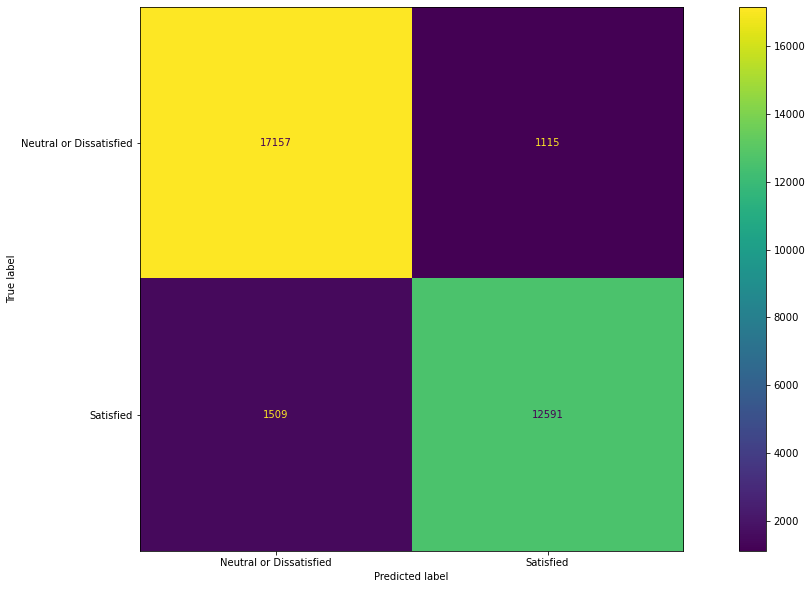

In [99]:
cm=confusion_matrix(y_test,y_pred,labels=dt1.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dt1.classes_)
disp.plot()

In [100]:
print(classification_report(y_test,y_pred))

                         precision    recall  f1-score   support

Neutral or Dissatisfied       0.92      0.94      0.93     18272
              Satisfied       0.92      0.89      0.91     14100

               accuracy                           0.92     32372
              macro avg       0.92      0.92      0.92     32372
           weighted avg       0.92      0.92      0.92     32372



In [101]:
dt1

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=17, min_samples_leaf=10)

In [104]:
def tree_display(model):
    """This function will display the tree"""
    plt.figure(figsize=(15,10))
    tree.plot_tree(model,feature_names=X.columns,class_names=["Neutral or Dissatisfied","Satisfied"],filled=True,max_depth=2)
    plt.show()

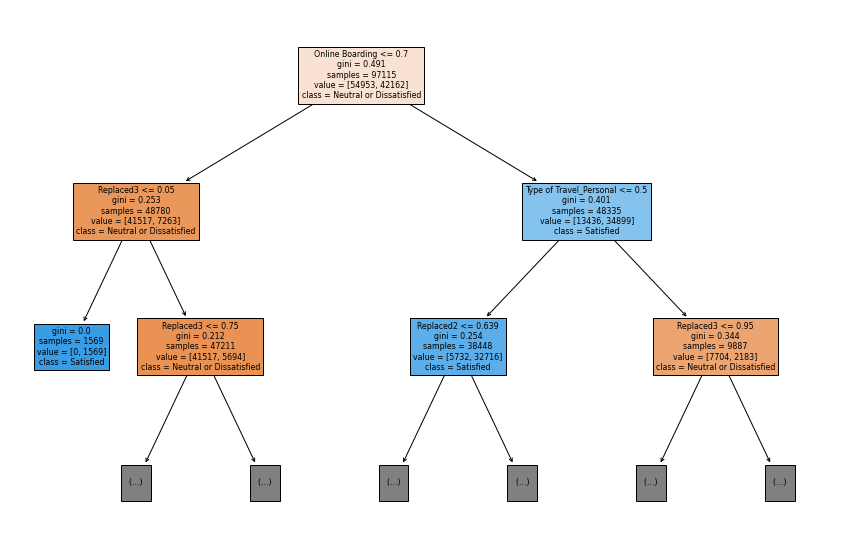

In [105]:
tree_display(dt1)

In [77]:
from sklearn.model_selection import cross_val_score
dt1=DecisionTreeClassifier(max_depth=8, max_leaf_nodes=17, min_samples_leaf=10)
scores = cross_val_score(dt1, X_scaled, y, cv=10)

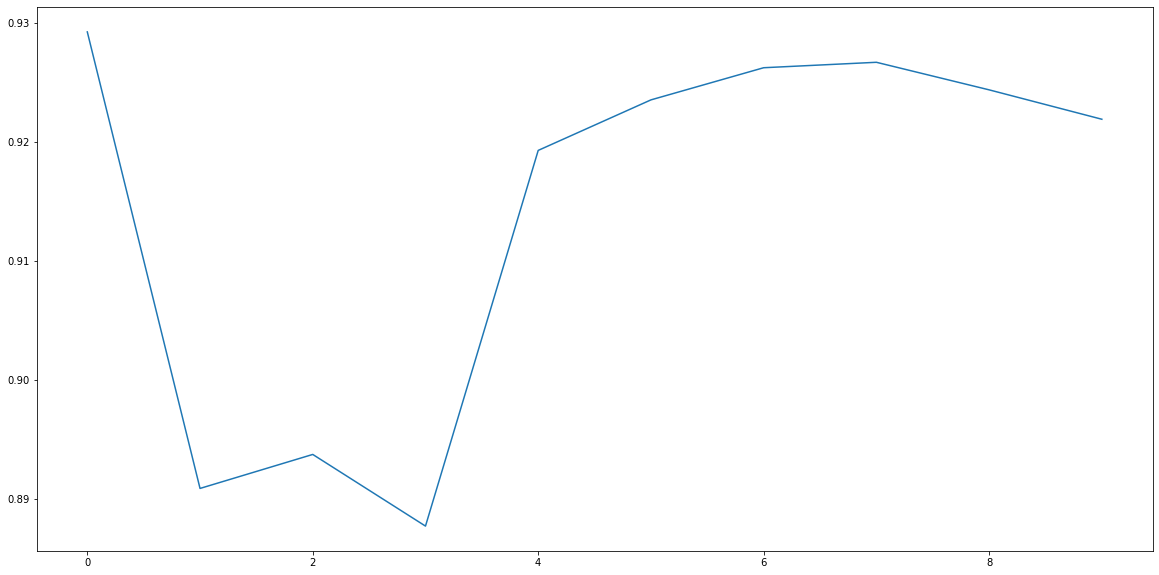

In [78]:
plt.plot(scores)

In [79]:
scores

array([0.92926095, 0.8908796 , 0.89373697, 0.88771334, 0.91929879,
       0.92354622, 0.92624913, 0.92670683, 0.92438987, 0.92191844])

# Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
scores = cross_val_score(lr, X_scaled, y, cv=10)

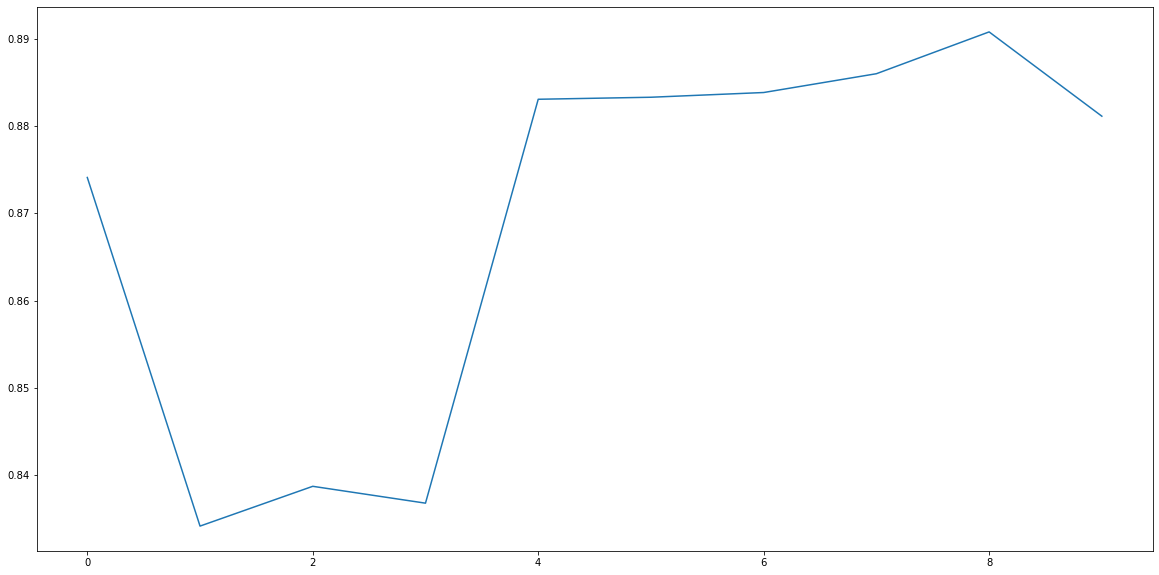

In [81]:
plt.plot(scores)

In [82]:
from sklearn.model_selection import GridSearchCV
lr=LogisticRegression()

params={'penalty':['l1','l2'],'C':[2,1,0.1,0.01,0.001,0.0001],'fit_intercept':[True,False]}
clf = GridSearchCV(lr, params)
clf.fit(X_train,y_train)
clf.best_params_

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(
ValueErr

{'C': 1, 'fit_intercept': True, 'penalty': 'l2'}

In [83]:
lr=clf.best_estimator_
lr.score(X_test,y_test)

0.8711231928827382

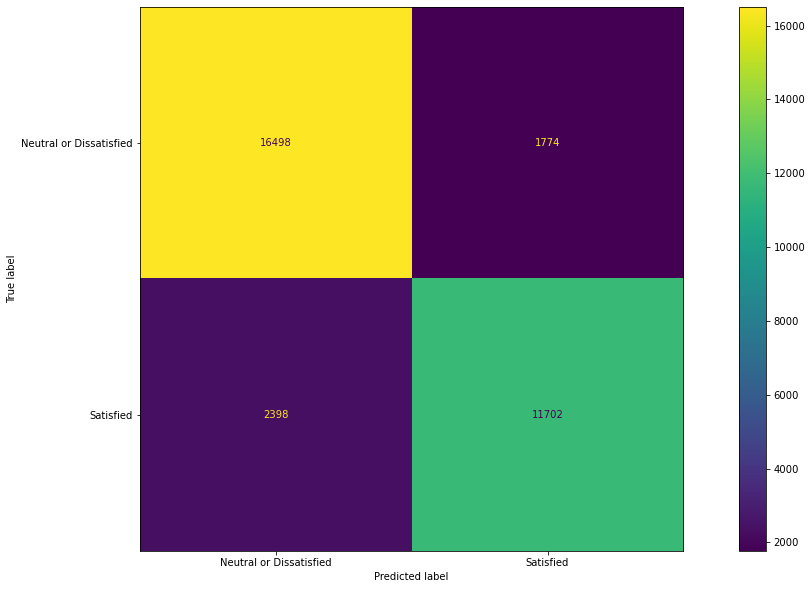

In [84]:
cm=confusion_matrix(y_test,lr.predict(X_test),labels=lr.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr.classes_)
disp.plot()

# AdaBoostClassifier

In [85]:
dt1

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=17, min_samples_leaf=10)

In [86]:
from sklearn.ensemble import AdaBoostClassifier
score=[]
for i in range(50,1000,100):
    ad=AdaBoostClassifier(dt1,n_estimators=i)
    ad.fit(X_train,y_train)
    y_pred=ad.predict(X_test)
    score.append(accuracy_score(y_test,y_pred)) 

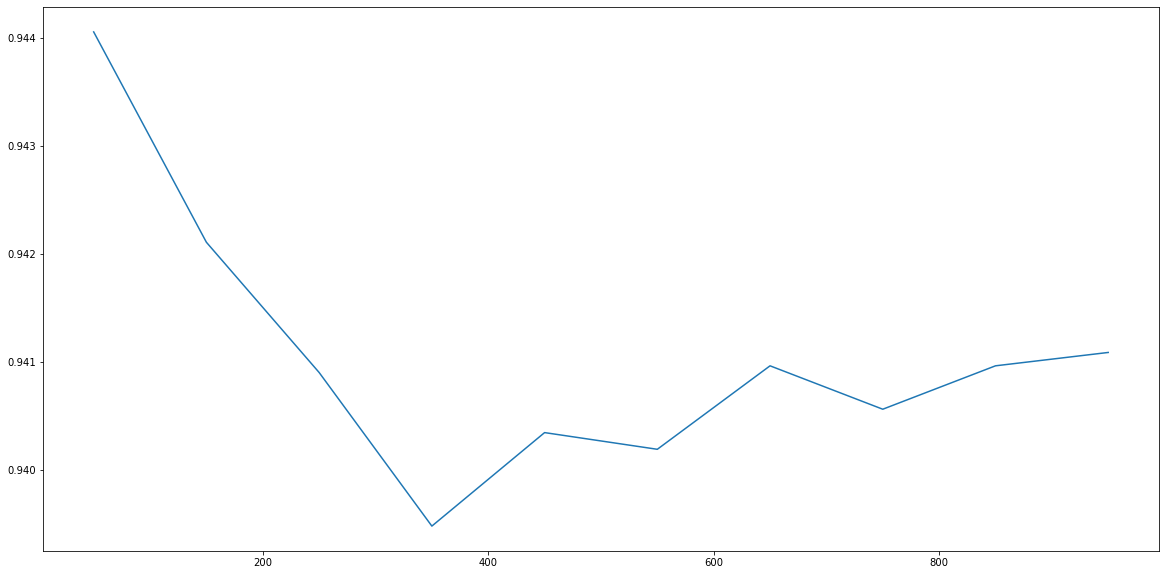

In [87]:
plt.plot(range(50,1000,100),score)

In [88]:
score

[0.944056592116644,
 0.942110465834672,
 0.9409057209934512,
 0.9394847398986779,
 0.9403496849128877,
 0.9401952304460645,
 0.9409675027801804,
 0.9405659211664401,
 0.9409675027801804,
 0.9410910663536389]

In [89]:
ad=AdaBoostClassifier(dt1,n_estimators=100)
scores = cross_val_score(ad, X_scaled, y, cv=10)

In [90]:
scores

array([0.9537416 , 0.92084331, 0.91945324, 0.92177002, 0.94717739,
       0.95320102, 0.95150205, 0.95474205, 0.9534291 , 0.9495675 ])

# Random Forest Classifier

In [108]:
X_train

,Replaced1,Replaced2,Replaced3,Replaced4,Age,Flight Distance,Departure and Arrival Time Convenience,Check-in Service,Online Boarding,Gate Location,On-board Service,Leg Room Service,Gender_Male,Customer Type_Returning,Type of Travel_Personal,Class_Economy,Class_Economy Plus
36085,0.000000,0.333333,0.7,0.500,0.615385,0.050283,1.0,0.8,0.6,1.0,0.6,0.6,0.0,1.0,0.0,0.0,0.0
60161,0.000315,1.000000,0.8,0.875,0.423077,0.291801,0.8,0.8,0.8,0.6,0.6,0.8,1.0,0.0,0.0,0.0,0.0
55033,0.000000,0.611111,0.6,0.750,0.705128,0.116721,1.0,0.4,0.8,0.4,0.8,0.8,0.0,1.0,0.0,1.0,0.0
105457,0.005038,0.444444,0.2,0.000,0.807692,0.163772,0.6,0.4,0.2,0.6,0.2,0.2,0.0,1.0,1.0,1.0,0.0
69760,0.000000,0.666667,0.2,0.250,0.487179,0.041397,0.8,0.8,0.8,0.4,0.4,0.2,0.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1726,0.000000,0.611111,0.5,0.750,0.371795,0.476373,0.2,0.6,0.6,0.2,0.8,0.6,0.0,1.0,0.0,0.0,0.0
35653,0.000000,0.555556,0.6,0.250,0.397436,0.034128,0.8,0.6,0.6,0.8,0.4,0.4,0.0,1.0,0.0,0.0,0.0
91256,0.048174,0.611111,0.6,0.125,0.448718,0.131058,0.6,0.8,0.6,0.4,0.4,1.0,0.0,0.0,0.0,1.0,0.0
94483,0.003463,0.277778,0.4,0.000,0.615385,0.082795,0.6,0.6,0.4,0.6,0.2,0.2,0.0,1.0,0.0,1.0,0.0


In [107]:
from sklearn.ensemble import RandomForestClassifier

In [110]:
dt1

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=17, min_samples_leaf=10)

In [111]:
score=[]
for i in range(50,1000,50):
    rf=RandomForestClassifier(max_depth=8, max_leaf_nodes=17, min_samples_leaf=10,n_estimators=i)
    rf.fit(X_train,y_train)
    s=rf.score(X_test,y_test)
    score.append(s)

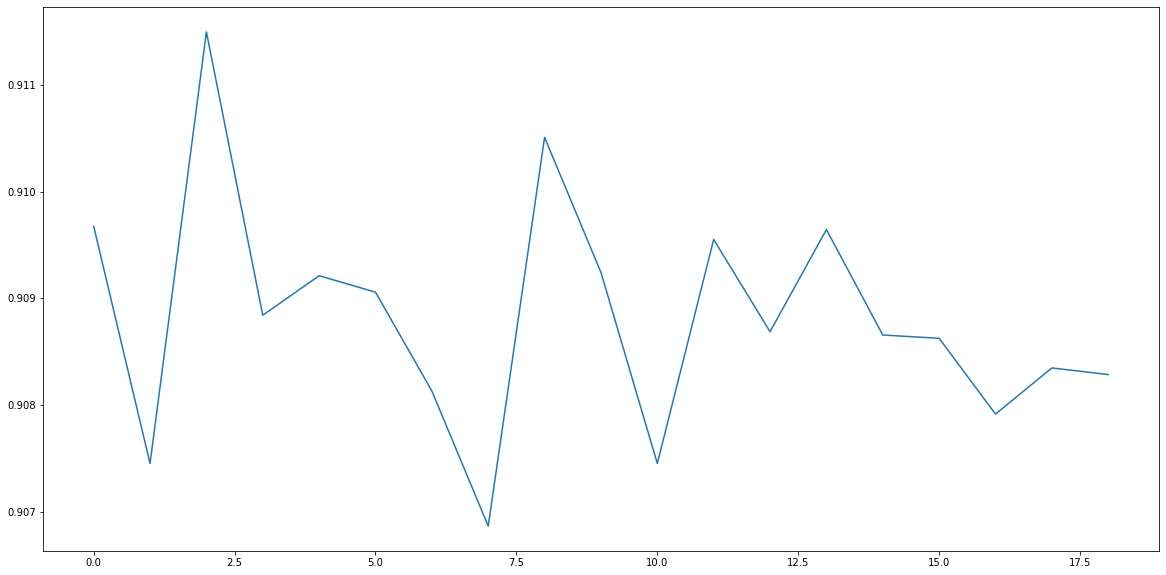

In [112]:
plt.plot(score)